## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import nltk 
import numpy as np
import re
from nltk.stem import wordnet # to perform lemmitization
from sklearn.feature_extraction.text import CountVectorizer # to perform bow
from sklearn.feature_extraction.text import TfidfVectorizer # to perform tfidf
from nltk import pos_tag # for parts of speech
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
from nltk import word_tokenize # to create tokens
from nltk.corpus import stopwords # for stop words
import warnings
warnings.filterwarnings("ignore")

## IMPORTING DATASET

In [2]:
df=pd.read_excel('/Users/ckishorekumarraju/Desktop/stream/dataset.xlsx')
df.head(20)

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
0,"Dear name,\n\nIt’s my absolute pleasure to rec...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,"Dear Professor name,\n\nMy name is name. I was...",NaN,NaN
2,"Dear name,\n\nI’m reaching out to request a le...",NaN,NaN
3,"Dear name,\n\nMy name is name. I volunteered a...",NaN,NaN
4,"Dear name,\n\nI am writing to you to request t...",NaN,NaN
5,"Dear Professor name,\n\nI have greatly enjoyed...",NaN,NaN
6,To whom it may concern:\n\nIt is my pleasure t...,NaN,NaN
7,"Dear Sir,\n\nI am sending herewith a team of t...",NaN,NaN
8,Dear name: \nname Applicant has worked directl...,NaN,NaN
9,"Dear name, \n1 am contacting you today in rega...",NaN,NaN


In [3]:
# count the number of rows in dataset
df.count()

CONTEXT_OF_SAMPLE_MAIL    318
EMAIL_TEMPLATES            34
EMAIL_TOPICS               34
dtype: int64

### Fills the null value with the previous value.

In [4]:
df.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
0,"Dear name,\n\nIt’s my absolute pleasure to rec...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,"Dear Professor name,\n\nMy name is name. I was...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
2,"Dear name,\n\nI’m reaching out to request a le...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
3,"Dear name,\n\nMy name is name. I volunteered a...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
4,"Dear name,\n\nI am writing to you to request t...",EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
...,...,...,...
313,"Hotel Reservation Letter Sample\nNovember 23, ...",Hotel Booking Confirmation ...,Hotel Booking Confirmation
314,PUBLIC\nCHICAGO\nWE LOOK\nFORWARD TO\nSEEING Y...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
315,"www.setupmyhotel.com\nHotel Name\nAddress,\nT ...",Hotel Booking Confirmation ...,Hotel Booking Confirmation
316,"Hotel Riu Costa Lago - All Inclusive, Torremol...",Hotel Booking Confirmation ...,Hotel Booking Confirmation


In [5]:
# count the number of rows in dataset after filling null values
df.count()

CONTEXT_OF_SAMPLE_MAIL    318
EMAIL_TEMPLATES           318
EMAIL_TOPICS              318
dtype: int64

#### DATASET DESCRIPTION

In [6]:
df.describe()

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
count,318,318,318
unique,310,34,34
top,Hello name\nI hope all is great with you. I wo...,COVER LETTER ...,LEAVE LETTER
freq,3,10,10


In [7]:
df1=df.head(10) # copy of first ten rows of dataset

In [8]:
# function that converts text into lower case and removes special characters

def step1(x):
    for i in x:
        a=str(i).lower()
        p=re.sub(r'[^a-z0-9]',' ',a)
        print(p)

## SAMPLE VISUALIZATION OF 1st 10 mails

In [9]:
step1(df1['CONTEXT_OF_SAMPLE_MAIL'])

dear name   it s my absolute pleasure to recommend name for the sales manager position with the sales company   joanne and i worked together at generic sales company  where i was her manager and direct supervisor from 2015 to 2019   i thoroughly enjoyed my time working with joanne and came to know her as a truly valuable asset to our team  she is honest  dependable  and incredibly hardworking  beyond that  she is an impressive problem solver who is able to address complex issues strategically and confidently name is inspired by challenges and never intimidated by them   her knowledge of sales etiquette and expertise in cold calling was a huge advantage to our entire office  not only did she put this skill set to work  but she also led a series of training sessions on cold calling with the team increasing our total sales by over 18  in just one quarter  i know that name was a huge piece of our success   along with her undeniable talent  name has always been an absolute joy to work with 

## CLEANING THE MAILS

In [10]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [11]:
df['CONTEXT_OF_SAMPLE_MAIL'] = df.CONTEXT_OF_SAMPLE_MAIL.apply(clean)
df.CONTEXT_OF_SAMPLE_MAIL

0      dear name\n\nits my absolute pleasure to recom...
1      dear professor name\n\nmy name is name i was y...
2      dear name\n\nim reaching out to request a lett...
3      dear name\n\nmy name is name i volunteered at ...
4      dear name\n\ni am writing to you to request th...
                             ...                        
313    hotel reservation letter sample\nnovember  \nt...
314    public\nchicago\nwe look\nforward to\nseeing y...
315    wwwsetupmyhotelcom\nhotel name\naddress\nt  f ...
316    hotel riu costa lago  all inclusive torremolin...
317    setup my hotel\nsample forms documents and dis...
Name: CONTEXT_OF_SAMPLE_MAIL, Length: 318, dtype: object

In [12]:
df.head()

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER


In [13]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['CONTEXT_OF_SAMPLE_MAIL'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,to,1738
1,the,1462
2,you,1134
3,and,1109
4,of,821
...,...,...
4784,method,1
4785,ta,1
4786,thereafter,1
4787,medium,1


In [14]:
text = ' '.join(df['CONTEXT_OF_SAMPLE_MAIL'])
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)

<FreqDist with 4831 samples and 42559 outcomes>


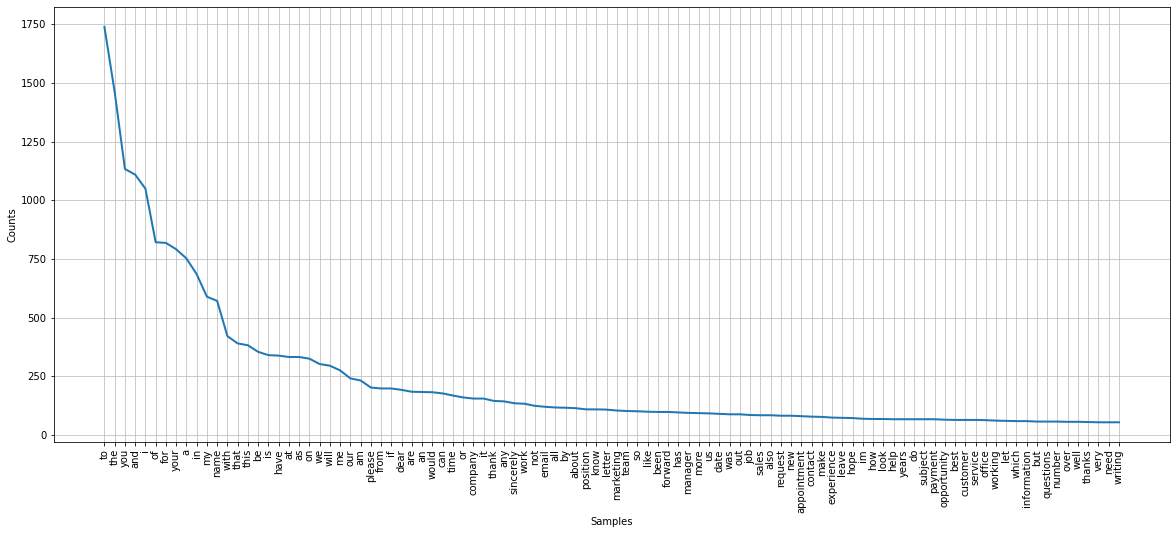

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

<AxesSubplot:title={'center':'Stopwords in mails'}, xlabel='word'>

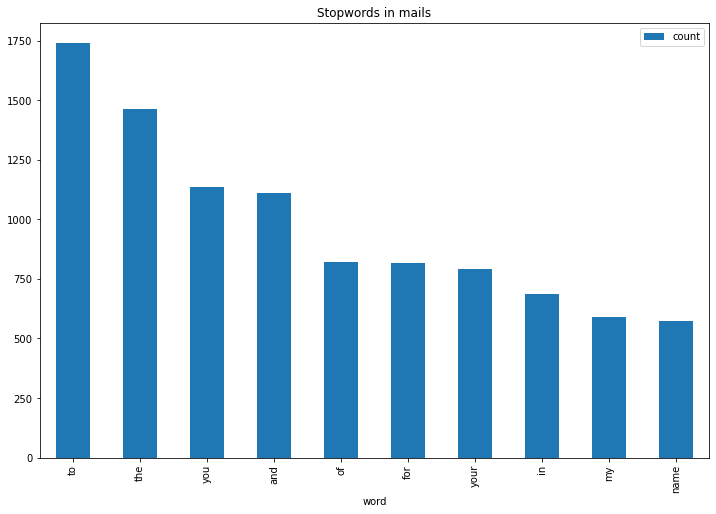

In [16]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Stopwords in mails')

## THERE ARE SO MANY STOPWORDS WE NEED TO REMOVE THAT

In [17]:
# all the stop words we have 
stop = stopwords.words('english')
new_words=('dear','name', 'work', 'email','please','would','time','company','sincerely')
for i in new_words:
    stop.append(i)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## REMOVING STOPWORDS

In [18]:
df['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'] = df['CONTEXT_OF_SAMPLE_MAIL'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [19]:
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS,CONTEXT_OF_SAMPLE_MAIL_without_stopwords
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,absolute pleasure recommend sales manager posi...
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,professor student business marketing fall seme...
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,im reaching request letter recommendation rega...
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,volunteered san francisco aspca elk dr supervi...
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,writing request provide reference begin job se...
...,...,...,...,...
313,hotel reservation letter sample\nnovember \nt...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel reservation letter sample november hotel...
314,public\nchicago\nwe look\nforward to\nseeing y...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,public chicago look forward seeing mr mcguire ...
315,wwwsetupmyhotelcom\nhotel name\naddress\nt f ...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,wwwsetupmyhotelcom hotel address f e adminsetu...
316,hotel riu costa lago all inclusive torremolin...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel riu costa lago inclusive torremolinos ma...


In [20]:
book = [x.strip() for x in df.CONTEXT_OF_SAMPLE_MAIL] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

# LEMMATIZATION TEXT

In [21]:
# function that performs text normalization steps

def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words) # returns the lemmatized tokens as a sentence 

In [22]:
text_normalization('dear arya smith   it s my absolute pleasure to recommend joanne adams for the sales manager position with the sales company   joanne and i worked together at generic sales company  where i was her manager and direct supervisor from 2015 to 2019   i thoroughly enjoyed my time working with joanne and came to know her as a truly valuable asset to our team  she is honest  dependable  and incredibly hardworking  beyond that  she is an impressive problem solver who is able to address complex issues strategically and confidently  joanne is inspired by challenges and never intimidated by them   her knowledge of sales etiquette and expertise in cold calling was a huge advantage to our entire office  not only did she put this skill set to work  but she also led a series of training sessions on cold calling with the team increasing our total sales by over 18  in just one quarter  i know that joanne was a huge piece of our success   along with her undeniable talent  joanne has always been an absolute joy to work with  she is a true team player  and always fosters positive discussions and brings the best out of other employees   without a doubt  i confidently recommend joanne to join your team at the sales company  as a dedicated and knowledgeable employee and an all around great person  i know that she will be a beneficial addition to your organization   please feel free to contact me at 555 123 4567 if you want to discuss joanne s qualifications and experience further  i d be happy to expand on my recommendation   best wishes   kat boogaard director of sales generic sales company')

'dear arya smith it s my absolute pleasure to recommend joanne adam for the sale manager position with the sale company joanne and i work together at generic sale company where i be her manager and direct supervisor from to i thoroughly enjoy my time work with joanne and come to know her a a truly valuable asset to our team she be honest dependable and incredibly hardworking beyond that she be an impressive problem solver who be able to address complex issue strategically and confidently joanne be inspire by challenge and never intimidate by them her knowledge of sale etiquette and expertise in cold call be a huge advantage to our entire office not only do she put this skill set to work but she also lead a series of train session on cold call with the team increase our total sale by over in just one quarter i know that joanne be a huge piece of our success along with her undeniable talent joanne have always be an absolute joy to work with she be a true team player and always foster pos

In [23]:
df['lemmatized_text']=df['CONTEXT_OF_SAMPLE_MAIL_without_stopwords'].apply(text_normalization) # applying the fuction to the dataset to get clean text
df.tail(15)

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS,CONTEXT_OF_SAMPLE_MAIL_without_stopwords,lemmatized_text
303,hello \n\nit looks like your car is almost due...,Car Sales :Service Reminder ...,Service Reminder,hello looks like car almost due maintenance he...,hello look like car almost due maintenance hel...
304,hello \n\nnobody likes the hassle of getting t...,Car Sales :Service Reminder ...,Service Reminder,hello nobody likes hassle getting car serviced...,hello nobody like hassle get car service coupl...
305,service reminders outstanding recommendations...,Car Sales :Service Reminder ...,Service Reminder,service reminders outstanding recommendations ...,service reminder outstanding recommendation su...
306,service customer intermediate service reminde...,Car Sales :Service Reminder ...,Service Reminder,service customer intermediate service reminder...,service customer intermediate service reminder...
307,service customer we havent seen you\nsubject ...,Car Sales :Service Reminder ...,Service Reminder,service customer havent seen subject customer ...,service customer havent see subject customer h...
308,\naddress sender\ndate june \nname recipient...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,address sender date june recipient address rec...,address sender date june recipient address rec...
309,dear \n\nthis email is to confirm your booking...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,confirm booking single room three nights break...,confirm book single room three night breakfast...
310,dear name\n\n thank you for choosing to st...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,thank choosing stay us sample hotel pleased co...,thank choose stay u sample hotel please confir...
311,reservation letter for hotel sample\nname inn\...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,reservation letter hotel sample inn big indian...,reservation letter hotel sample inn big indian...
312,from\nname\nmanager\nqueen marts hotel\n brand...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,manager queen marts hotel brandy court oakland...,manager queen mart hotel brandy court oakland ...


## COUNT OF WORDS AFTER LEMMATIZATION

In [24]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X1 = cv.fit_transform(df['lemmatized_text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']

wf_df1

,word,count
0,appointmenti,1109
1,reverence,821
2,inclusion,818
3,mention,685
4,recover,589
...,...,...
3810,nonsmoking,1
3811,mineral,1
3812,refund,1
3813,thereafter,1


<AxesSubplot:title={'center':'lemmatized text'}, xlabel='word'>

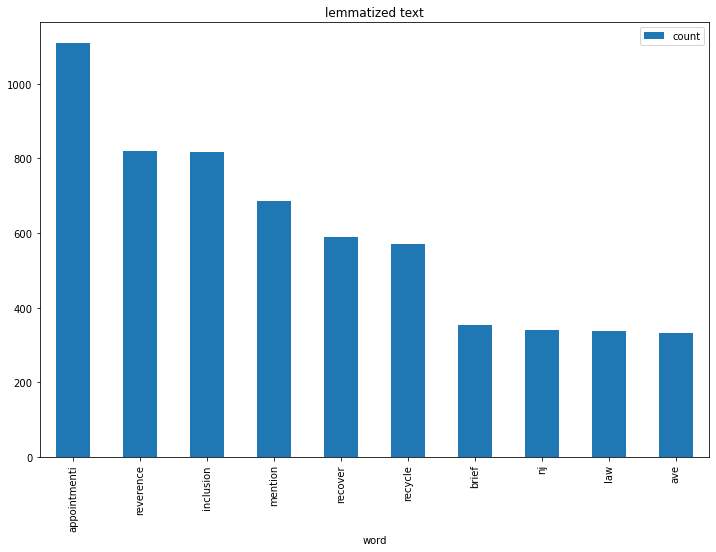

In [25]:
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='lemmatized text')

## FREQUENCY OF WORDS AFTER LEMMATIZATION

In [26]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['lemmatized_text']).split()).value_counts()[:50] # for top 20
freq_Sw

thank          158
make           122
position       122
look           119
know           118
letter         110
request        107
team           105
year           102
like           100
forward         98
date            98
manager         97
job             95
leave           94
u               92
help            92
work            88
take            88
experience      88
appointment     86
contact         85
sale            84
customer        84
also            84
new             83
write           82
service         82
marketing       82
opportunity     79
need            78
get             78
regard          74
hope            73
day             73
im              69
subject         68
payment         68
office          66
well            65
project         65
best            64
let             64
want            64
week            63
number          62
question        61
call            59
information     59
reach           57
dtype: int64

In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

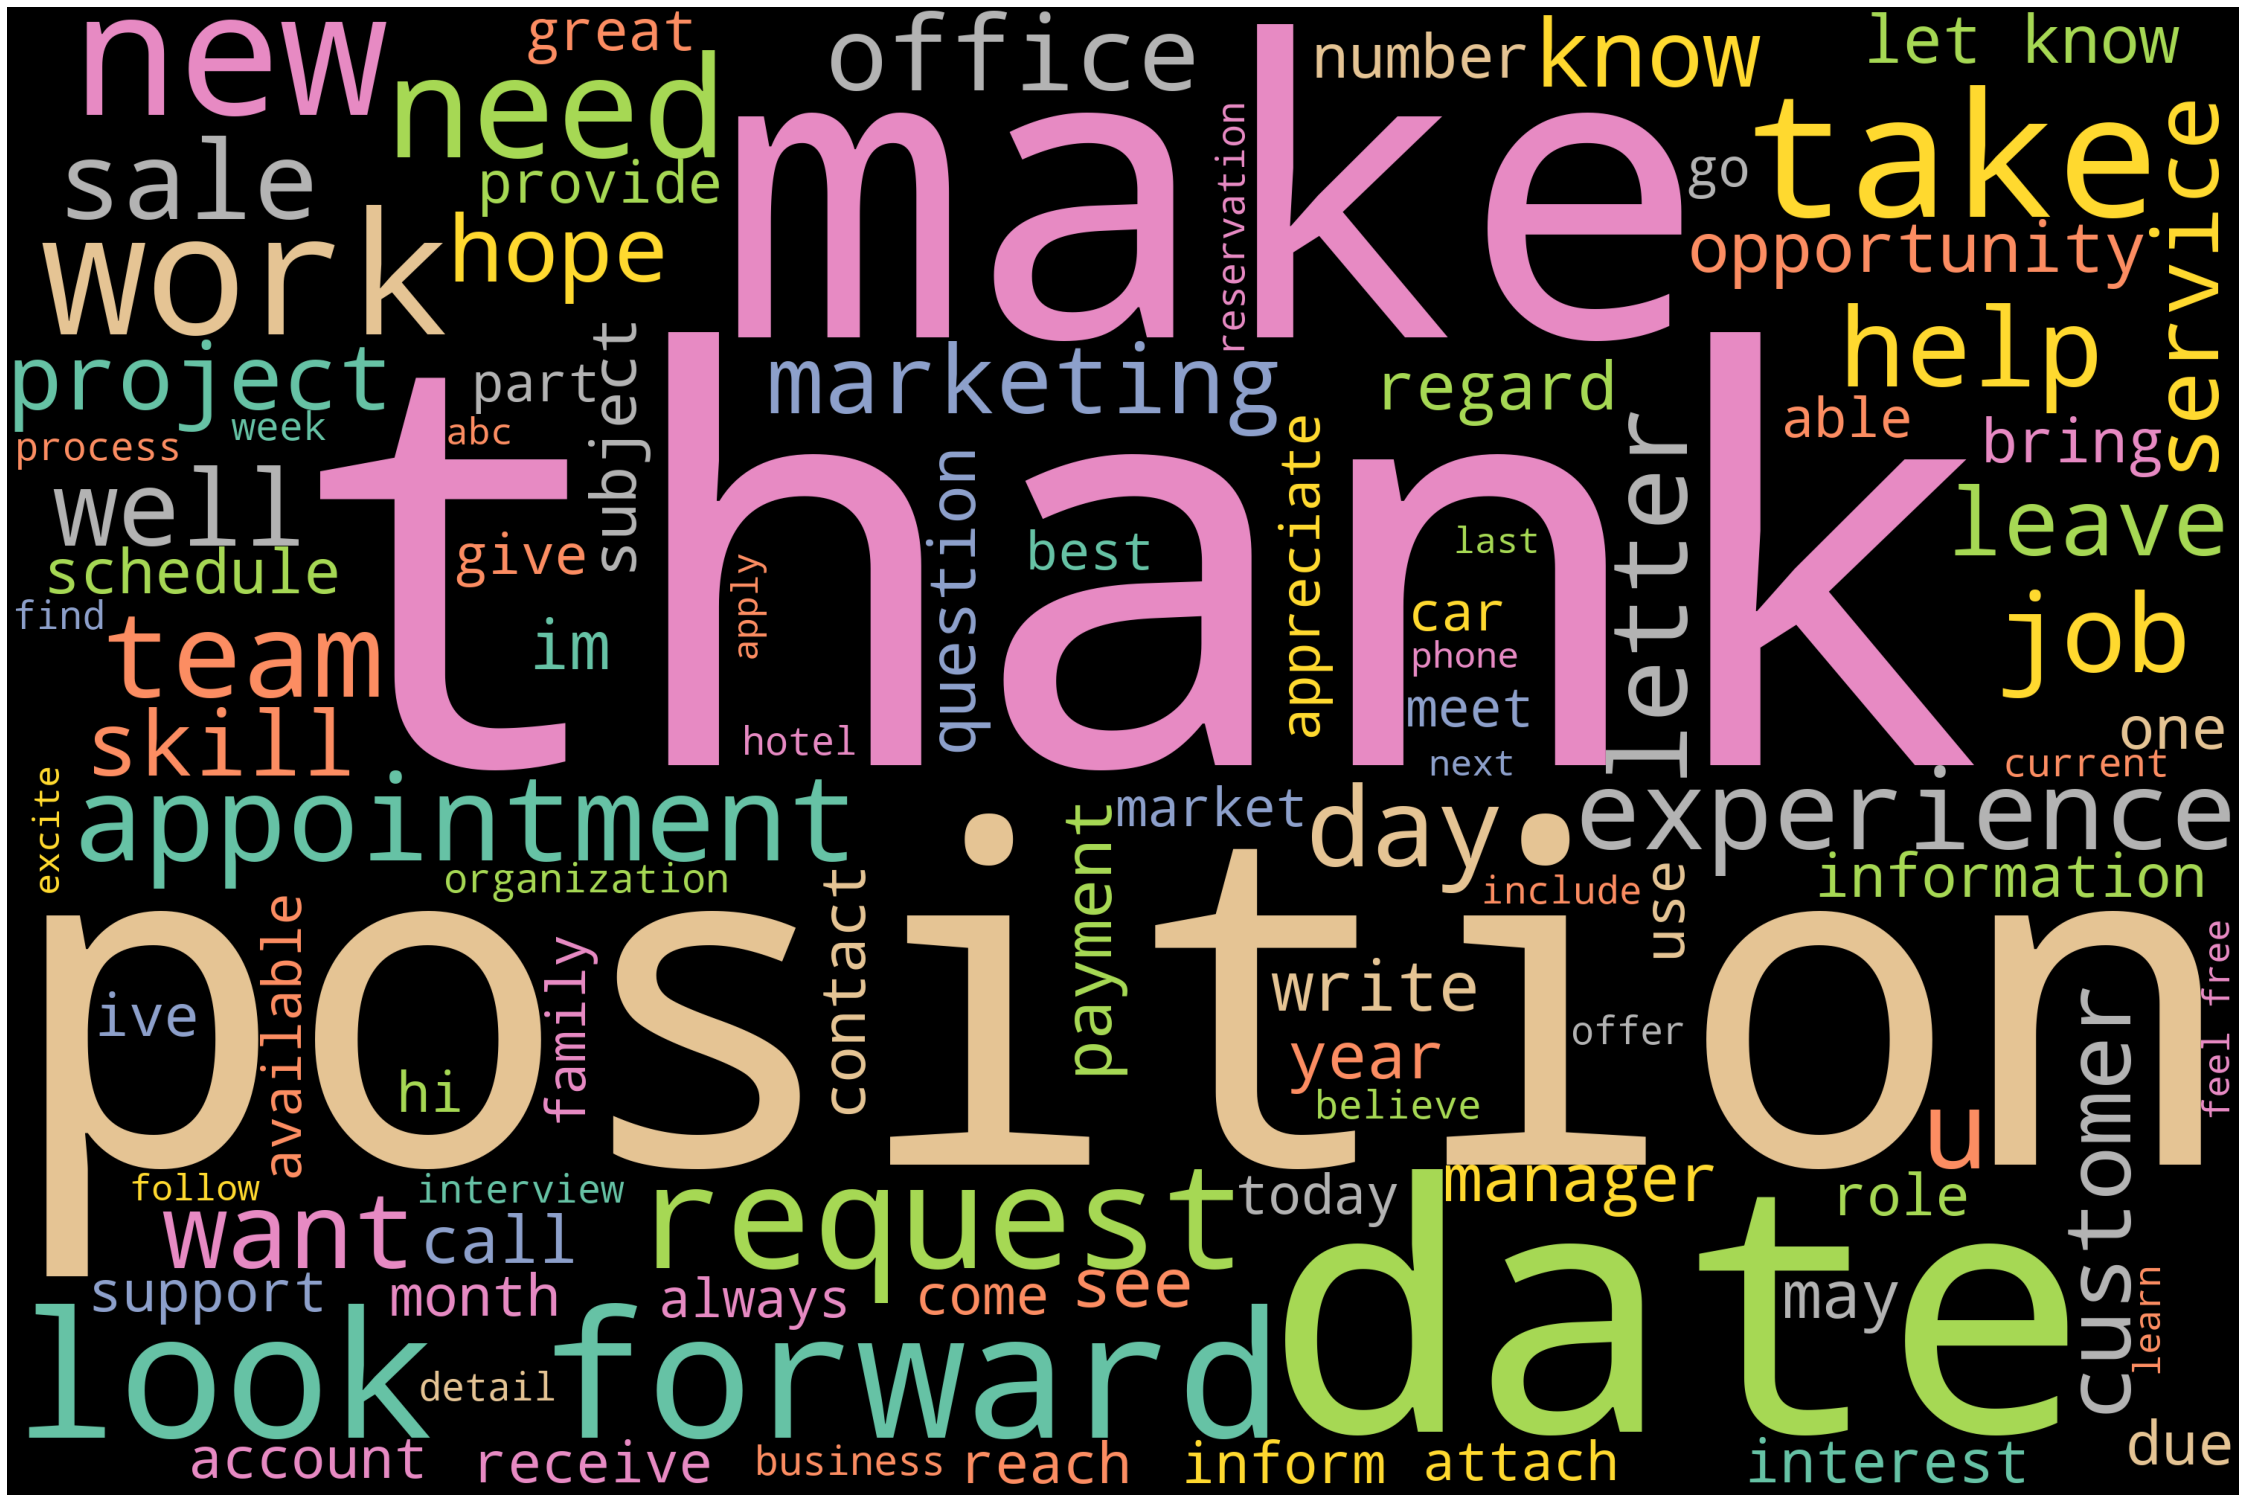

In [28]:
text = df['lemmatized_text'].values 

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(str(text))
plot_cloud(wordcloud)

## DEFINE A NEW DATADRAME

In [29]:
data = df[["lemmatized_text","EMAIL_TEMPLATES","EMAIL_TOPICS"]]
data

,lemmatized_text,EMAIL_TEMPLATES,EMAIL_TOPICS
0,absolute pleasure recommend sale manager posit...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
1,professor student business market fall semeste...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
2,im reach request letter recommendation regard ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
3,volunteered san francisco aspca elk dr supervi...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
4,write request provide reference begin job sear...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER
...,...,...,...
313,hotel reservation letter sample november hotel...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
314,public chicago look forward see mr mcguire tha...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
315,wwwsetupmyhotelcom hotel address f e adminsetu...,Hotel Booking Confirmation ...,Hotel Booking Confirmation
316,hotel riu costa lago inclusive torremolinos ma...,Hotel Booking Confirmation ...,Hotel Booking Confirmation


# NAMED ENTITY RECOGNITION

In [30]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [31]:
!pip install spacy
import warnings
warnings.filterwarnings("ignore")

In [32]:
!pip install en_core_web_sm

In [33]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
text_nlp = nlp(no_punc_text)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [35]:
# print named entities in article
ner_tagged = [(word.text, word.ent_type_) for word in text_nlp]
from spacy import displacy

# visualize named entities
displacy.render(text_nlp, style='ent', jupyter=True)

In [36]:
named_entities = []
temp_entity_name = ''
temp_named_entity = None
for term, tag in ner_tagged:
    if tag:
        temp_entity_name = ' '.join([temp_entity_name, term]).strip()
        temp_named_entity = (temp_entity_name, tag)
    else:
        if temp_named_entity:
            named_entities.append(temp_named_entity)
            temp_entity_name = ''
            temp_named_entity = None

In [37]:
print(named_entities)

[('just one quarter', 'DATE'), ('today', 'DATE'), ('lexington', 'GPE'), ('the san francisco', 'LOC'), ('about three years ago', 'DATE'), ('aspca', 'ORG'), ('this spring', 'DATE'), ('four', 'CARDINAL'), ('the past three years', 'DATE'), ('over three years', 'DATE'), ('extra hours', 'TIME'), ('ten', 'CARDINAL'), ('the third year', 'DATE'), ('tenday', 'DATE'), ('six', 'CARDINAL'), ('four', 'CARDINAL'), ('this year', 'DATE'), ('next four years', 'DATE'), ('tomorrow morning', 'TIME'), ('the past six months', 'DATE'), ('washington', 'GPE'), ('today', 'DATE'), ('two years', 'DATE'), ('five years', 'DATE'), ('more than years', 'DATE'), ('the coming days', 'DATE'), ('linkedincominnamelynette', 'NORP'), ('my first three years', 'DATE'), ('daily', 'DATE'), ('australia', 'GPE'), ('new zealand', 'GPE'), ('harvard university', 'ORG'), ('the united states of america', 'GPE'), ('yale university', 'ORG'), ('today', 'DATE'), ('june', 'DATE'), ('harvard university', 'ORG'), ('today', 'DATE'), ('yale univ

In [38]:
from collections import Counter
c = Counter([item[1] for item in named_entities])
c.most_common()

[('DATE', 381),
 ('ORG', 89),
 ('GPE', 62),
 ('PERSON', 49),
 ('CARDINAL', 42),
 ('TIME', 36),
 ('ORDINAL', 18),
 ('NORP', 6),
 ('LOC', 5),
 ('QUANTITY', 2),
 ('FAC', 2),
 ('LANGUAGE', 1),
 ('MONEY', 1),
 ('WORK_OF_ART', 1)]

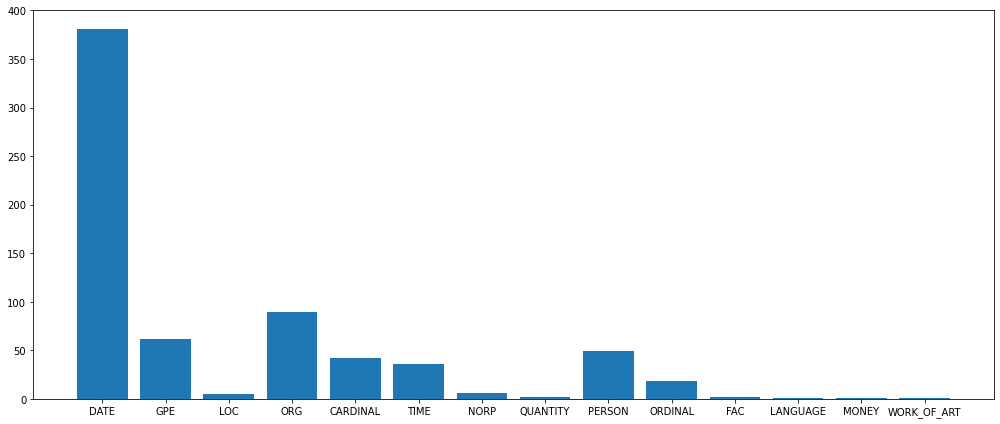

In [39]:
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams["figure.autolayout"] = True
plt.bar(c.keys(), c.values())

plt.show()

### PART OF SPEECH TAGGING

In [40]:
for token in text_nlp:
    print(token, token.pos_)

dear ADJ
name NOUN


 SPACE
its PRON
my PRON
absolute ADJ
pleasure NOUN
to PART
recommend VERB
name NOUN
for ADP
the DET
sales NOUN
manager NOUN
position NOUN
with ADP
the DET
sales NOUN
company NOUN


 SPACE
joanne PROPN
and CCONJ
i PRON
worked VERB
together ADV
at ADP
generic ADJ
sales NOUN
company NOUN
where ADV
i PRON
was VERB
her PRON
manager NOUN
and CCONJ
direct ADJ
supervisor NOUN
from ADP
  SPACE
to ADP


 SPACE
i PRON
thoroughly ADV
enjoyed VERB
my PRON
time NOUN
working VERB
with ADP
joanne PROPN
and CCONJ
came VERB
to PART
know VERB
her PRON
as ADP
a DET
truly ADV
valuable ADJ
asset NOUN
to ADP
our PRON
team NOUN
she PRON
is VERB
honest ADJ
dependable ADJ
and CCONJ
incredibly ADV
hardworking ADJ
beyond ADP
that DET
she PRON
is VERB
an DET
impressive ADJ
problem NOUN
solver ADV
who PRON
is VERB
able ADJ
to PART
address VERB
complex ADJ
issues NOUN
strategically ADV
and CCONJ
confidentlyname NOUN
is AUX
inspired VERB
by ADP
challenges NOUN
and CCONJ
never ADV
intimidated VERB

discuss VERB
this DET
further ADV


 SPACE
thanks NOUN
so ADV
much ADV
for ADP
all DET
you PRON
have AUX
done VERB
for ADP
me PRON
and CCONJ
for ADP
taking VERB
the DET
time NOUN
to PART
review VERB
this DET
request NOUN


 SPACE
sincerely ADV


 SPACE
name NOUN
signature NOUN
hard ADJ
copy NOUN
letter NOUN


 SPACE
name NOUN
to PART
whom PRON
it PRON
may AUX
concern VERB


 SPACE
it PRON
is AUX
my PRON
pleasure NOUN
to PART
endorse VERB
name NOUN
for ADP
employment NOUN
in ADP
your PRON
esteemed ADJ
organisation NOUN
i PRON
have AUX
known VERB
name NOUN
for ADP
over ADP
three NUM
years NOUN
during ADP
which DET
he PRON
worked VERB
as ADP
a DET
communication NOUN
executive NOUN
in ADP
my PRON
office NOUN


 SPACE
i PRON
was AUX
highly ADV
impressed ADJ
with ADP
name NOUN
attitude NOUN
and CCONJ
efficiency NOUN
during ADP
the DET
time NOUN
that DET
he PRON
worked VERB
with ADP
me PRON
name NOUN
is AUX
both DET
very ADV
bright ADJ
and CCONJ
highly ADV
professional ADJ
i PRON
am VERB
conf

my PRON
tenacity NOUN
and CCONJ
penchant NOUN
for ADP
success NOUN
to ADP
your PRON
organization NOUN
in ADP
the DET
capacity NOUN
of ADP
the DET
senior ADJ
executive NOUN
as ADP
such ADJ
here ADV
are VERB
the DET
main ADJ
areas NOUN
of ADP
expertise NOUN
i PRON
will AUX
bring VERB
to ADP
your PRON
company NOUN

 SPACE
▪ PUNCT
a DET
strong ADJ
commitment NOUN
to ADP
the DET
industry NOUN
having AUX
contributed VERB
my PRON
talents NOUN
in ADP
the DET
food NOUN
and CCONJ
beverage NOUN
category NOUN
in ADP
a DET
variety NOUN
of ADP
roles NOUN
and CCONJ
capacities NOUN
• VERB
solid ADJ
marketing NOUN
background NOUN
and CCONJ
the DET
savvy NOUN
to PART
implement VERB
understand NOUN
and CCONJ
troubleshoot NOUN
marketing NOUN
operations NOUN
while SCONJ
achieving VERB
business NOUN
growth NOUN
and CCONJ
increased VERB
market NOUN
share NOUN
resulting VERB
in ADP
profitability NOUN
▪ PUNCT
the DET
entrepreneurial ADJ
spirit PROPN
adaptability NOUN
and CCONJ
knowledge NOUN
that DET
will AUX


  SPACE
linkedlncominname ADJ
in ADP
gmaninlone PROPN

 SPACE
i PRON
am AUX
writing VERB
to PART
express VERB
my PRON
interest NOUN
in ADP
the DET
summer NOUN
internship NOUN
program NOUN
with ADP
your PRON
marketing NOUN
company NOUN
i PRON
learned VERB
about ADP
your PRON
company NOUN
through ADP
the DET
student NOUN
center NOUN
at ADP
my PRON
university NOUN
and CCONJ
after ADP
visiting VERB
your PRON
website NOUN
i PRON
have AUX
immersed VERB
myself PRON
in ADP
your PRON
groundbreaking NOUN
work NOUN
in ADP
the DET
transportation NOUN
industry NOUN

 SPACE
currently ADV
majoring VERB
in ADP
marketing NOUN
with ADP
a DET
minor NOUN
in ADP
statistics NOUN
i PRON
will AUX
receive VERB
my PRON
degree NOUN
next ADJ
spring NOUN
while SCONJ
i PRON
have VERB
a DET
comprehensive ADJ
marketing NOUN
and CCONJ
analytics NOUN
background NOUN
my PRON
emphasis NOUN
is VERB
on ADP
government NOUN
campaigns NOUN
i PRON
feel VERB
that SCONJ
your PRON
agency NOUN
places VERB
prominence NOUN
in ADP
si

tactics NOUN


 

 SPACE
i PRON
know VERB
that SCONJ
munder ADJ
difflin NOUN
has AUX
doubled VERB
the DET
size NOUN
of ADP
the DET
business NOUN
while SCONJ
also ADV
making VERB
the DET

 SPACE
business NOUN
more ADV
green ADJ
because SCONJ
of ADP
my PRON
experience NOUN
working VERB
with ADP
clients NOUN
on ADP
similar ADJ
initiatives NOUN

 SPACE
such ADJ
as ADP
leed ADJ
certification NOUN
i PRON
know VERB
that SCONJ
name NOUN
will AUX
help VERB
me PRON
grow VERB
in ADP
my PRON
career NOUN
while SCONJ

 SPACE
also ADV
supporting VERB
my PRON
passion NOUN
for ADP
going VERB
green ADJ
i PRON
have AUX
always ADV
been AUX
impressed VERB
by ADP
your PRON
companys NOUN

 SPACE
phenomenal ADJ
results NOUN
that DET
have AUX
been AUX
achieved VERB
while SCONJ
supporting VERB
an DET
important ADJ
cause NOUN


 

 SPACE
i PRON
would AUX
be VERB
delighted ADJ
to PART
further ADV
discuss VERB
my PRON
experience NOUN
and CCONJ
qualifications NOUN
for ADP
the DET
marketing NOUN

 SPACE
manager NOUN

thanking VERB
you PRON
hi INTJ
name NOUN


  SPACE
am AUX
reaching VERB
out SCONJ
to ADP
you PRON
because SCONJ
being VERB
the DET
head NOUN
of ADP
marketing NOUN
  SPACE
was VERB
certain ADJ
you PRON
would AUX
know VERB
more ADJ
about ADP
the DET
current ADJ
process NOUN
in ADP

 SPACE
place NOUN
at ADP
your PRON
company NOUN
for ADP
customer NOUN
service NOUN


 SPACE
like INTJ
we PRON
ve AUX
helped VERB
   SPACE
felt VERB
you PRON
might AUX
be VERB
interested ADJ
in ADP
improving VERB
your PRON
customer NOUN
retention NOUN
by ADP
  SPACE
and CCONJ
reducing VERB
customer NOUN

 SPACE
response NOUN
time PROPN


  SPACE
did VERB
a DET
fair ADJ
amount NOUN
of ADP
research NOUN
on ADP
your PRON
companys NOUN
customer NOUN
support NOUN
before ADP
emailing VERB
you PRON
and CCONJ
have AUX
attached VERB
a DET
screenshot NOUN
from ADP
your PRON

 SPACE
website NOUN


 SPACE
i PRON
m AUX
sharing VERB
a DET
few ADJ
of ADP
my PRON
thoughts NOUN
here ADV
which DET
could AUX
help VERB
you PRON
sa

field NOUN

 SPACE
your PRON
organizations NOUN
goals NOUN
for ADP
the DET
year NOUN
etc X
and CCONJ
the DET
skills NOUN
and CCONJ
information NOUN
that DET
i PRON
will AUX
be VERB
able ADJ
to PART
bring VERB
back ADV

 SPACE
and CCONJ
use VERB
on ADP
the DET
job NOUN
will AUX
provide VERB
a DET
tangible ADJ
benefit NOUN
to ADP
   SPACE
a DET
copy NOUN
of ADP
the DET
conference PROPN

 SPACE
brochure NOUN
is AUX
attached VERB
for ADP
your PRON
review NOUN


 SPACE
cost NOUN
savings NOUN
for ADP
travel NOUN
and CCONJ
lodging NOUN
can AUX
be AUX
minimized VERB
by ADP
sharing VERB
a DET
room NOUN
with ADP
another DET
msae PROPN
member NOUN
or CCONJ

 SPACE
suggest VERB
splitting VERB
the DET
cost NOUN
with ADP
the DET
organization PROPN

 SPACE
i PRON
appreciate VERB
your PRON
consideration NOUN
in ADP
granting VERB
this DET
request NOUN

 SPACE
sincerely ADV

 SPACE
name NOUN
dear ADJ
name NOUN


 SPACE
as ADP
you PRON
know VERB
my PRON
truck NOUN
has AUX
been AUX
acting VERB
up ADP
quit

 SPACE
and CCONJ
services NOUN
a DET
copy NOUN
of ADP
our PRON
taxexempt NOUN
certificate NOUN
is AUX
attached VERB


 SPACE
thank VERB
you PRON
in ADP
advance NOUN
for ADP
your PRON
support NOUN


 SPACE
sincerely ADV


 SPACE
name NOUN

 SPACE
manager NOUN

  SPACE
dear ADJ
name NOUN


  SPACE
read VERB
your PRON
article NOUN
on ADP
the DET
intellectual ADJ
property NOUN
protection NOUN
restoration NOUN
act NOUN
on ADP
the DET
web NOUN
and CCONJ
was VERB

 SPACE
quite ADV
impressed ADJ


  SPACE
would AUX
like VERB
to PART
reprint VERB
itin NOUN
my PRON
company NOUN
newsletter NOUN
i PRON
ve AUX
attached VERB
a DET
copy NOUN
of ADP
the DET
newsletter NOUN
for ADP

 SPACE
your PRON
review NOUN
well INTJ
be VERB
sure ADJ
to PART
send VERB
you PRON
several ADJ
copies NOUN
of ADP
the DET
newsletter NOUN
for ADP
yourfiles NOUN


 SPACE
if SCONJ
this DET
is VERB
okay ADJ
with ADP
you PRON
would AUX
you PRON
please INTJ
sign VERB
this DET
note NOUN
and CCONJ
fax VERB
it PRON
back ADV
to ADP

ve AUX
raised VERB
customer NOUN
experience NOUN
phone NOUN
survey NOUN
ratings NOUN
by ADP
  SPACE
and CCONJ
boosted VERB
customer NOUN
retention NOUN
by ADP
  SPACE
i PRON
m VERB
sure ADJ
i PRON
can AUX
translate VERB
my PRON
  SPACE
years NOUN
of ADP
cs ADJ
experience NOUN
into ADP
similar ADJ
results NOUN
for ADP
xyz PROPN


 

 SPACE
can AUX
we PRON
schedule VERB
a DET
meeting NOUN
next ADP
week NOUN
to PART
discuss VERB
solutions NOUN
for ADP
making VERB
xyzs PROPN
customer NOUN
service NOUN
operations NOUN
more ADV
costeffective ADJ
and CCONJ
raising VERB
your PRON
nps NOUN
ratings NOUN
in ADP
the DET
upcoming ADJ
months NOUN


 

 SPACE
sincerely ADV


 

 SPACE
name VERB
dear ADJ
hiring NOUN
manager NOUN


 SPACE
reading VERB
your PRON
  SPACE
job NOUN
posting VERB
on ADP
craigslist NOUN
for ADP
an DET
assistant ADJ
communications NOUN
director NOUN
piqued VERB
my PRON
interest NOUN
your PRON
description NOUN
of ADP
the DET
work NOUN
responsibilities NOUN
incumbent ADJ
upon SC

awards NOUN
two NUM
years NOUN
ago ADV
  SPACE
strive VERB
to PART
stay VERB
on ADP
the DET
cuttingedge NOUN
of ADP
web NOUN
design NOUN
and CCONJ


 SPACE
development NOUN
so ADV
when ADV
  SPACE
saw VERB
this DET
job NOUN
posting VERB
  SPACE
knew VERB
i PRON
had VERB
to PART
apply VERB


 SPACE
during ADP
my PRON
previous ADJ
role NOUN
at ADP
   SPACE
built VERB
a DET
website NOUN
completely ADV
from ADP
scratch NOUN
for ADP
a DET
recently ADV

 SPACE
rebranded VERB
business NOUN
both DET
ahead ADV
of ADP
schedule NOUN
and CCONJ
within ADP
budget NOUN
  SPACE
started VERB
by ADP
gathering VERB
requirements NOUN
from ADP

 SPACE
my PRON
clients NOUN
and CCONJ
holding VERB
a DET
focus NOUN
group NOUN
to PART
perform VERB
user NOUN
research NOUN
my PRON
favorite ADJ
part NOUN
about ADP
web NOUN
design NOUN
is AUX

 SPACE
building VERB
a DET
solution NOUN
that DET
impresses VERB
the DET
client NOUN
and CCONJ
meets VERB
the DET
needs NOUN
of ADP
users NOUN
and CCONJ
customers NOUN
my PRO

i PRON
can AUX
see VERB
us PRON
three NUM
doing VERB
great ADJ
work NOUN


 SPACE
while SCONJ
i PRON
was AUX
applying VERB
for ADP
this DET
role NOUN
i PRON
noticed VERB
the DET
tightknit ADJ
company NOUN
culture NOUN
here ADV
which DET
made VERB
me PRON
excited ADJ
to PART
accept VERB
this DET
job NOUN
offer NOUN
i PRON
hope VERB
that SCONJ
over ADP
the DET
course NOUN
of ADP
the DET
next ADJ
few ADJ
weeks NOUN
i PRON
get VERB
the DET
chance NOUN
to PART
meet VERB
you PRON
all DET
in ADP
person NOUN


 SPACE
i PROPN
d AUX
like VERB
to PART
share VERB
some DET
details NOUN
about ADP
my PRON
own ADJ
professional ADJ
experience NOUN
prior ADV
to ADP
accepting VERB
this DET
position NOUN
i PRON
did VERB
a DET
lot NOUN
of ADP
freelance ADJ
work NOUN
my PRON
biggest ADJ
clients NOUN
were VERB
in ADP
the DET
fastfood NOUN
industry NOUN
although SCONJ
these DET
experiences NOUN
taught VERB
me PRON
a DET
lot NOUN
and CCONJ
helped VERB
me PRON
get VERB
a DET
large ADJ
portfolio NOUN
of ADP
work

the DET
account NOUN
of ADP
my PRON
husband NOUN
transfer NOUN
from ADP
mangalore NOUN
to PART
dubai VERB
the DET
reason NOUN
of ADP
getting VERB
the DET
leaves NOUN
for ADP
another DET
two NUM
years NOUN
is AUX
now ADV
getting VERB
more ADV
serious ADJ
as ADP
family NOUN
issues NOUN
and CCONJ
my PRON
spouses NOUN
health NOUN
is VERB
at ADP
stake NOUN
over ADV
there ADV
managing VERB
the DET
task NOUN
here ADV
all DET
on ADP
my PRON
own ADJ
is VERB
very ADV
tiresome ADJ
and CCONJ
dreadful ADJ
as ADV
well ADV

 SPACE
kindly ADV
consider VERB
the DET
grave ADJ
issues NOUN
which DET
i PRON
can AUX
not PART
disclose VERB
here ADV
but CCONJ
i PRON
am VERB
really ADV
in ADP
need NOUN
of ADP
getting VERB
the DET
leaves NOUN
please INTJ
grant VERB
me PRON
the DET
leaves NOUN
for ADP
two NUM
more ADJ
years NOUN
thanking VERB
you PRON
in ADP
anticipation NOUN

 SPACE
yours PRON
sincerely ADV

 SPACE
name NOUN

  SPACE
respected VERB
sir PROPN

 SPACE
it PRON
is AUX
stated VERB
that SCONJ
i PRON


i PRON
am VERB
on ADP
leave NOUN
i PRON
have AUX
already ADV
handed VERB
over ADP
all DET
material NOUN
regarding VERB
the DET
project NOUN
to ADP
him PRON
her PRON
and CCONJ
expect VERB
there PRON
to PART
be VERB
no DET
exigencies NOUN
in ADP
my PRON
absence NOUN

 SPACE
due ADP
to ADP
the DET
nature NOUN
of ADP
my PRON
travel NOUN
plans NOUN
i PRON
may AUX
not PART
be VERB
available ADJ
to PART
take VERB
phone NOUN
calls NOUN
i PRON
request VERB
you PRON
to PART
address VERB
any DET
urgent ADJ
workrelated VERB
matters NOUN
to ADP
my PRON
email NOUN
address NOUN
abcdgmailcom PROPN

 SPACE
i PRON
will AUX
be VERB
grateful ADJ
for ADP
a DET
positive ADJ
reply NOUN
on ADP
my PRON
leave NOUN
request NOUN

 SPACE
thank VERB
and CCONJ
regards VERB

 SPACE
name NOUN

  SPACE
dear ADJ
name NOUN

 SPACE
i PRON
am AUX
writing VERB
this DET
letter NOUN
to PART
inform VERB
you PRON
that SCONJ
i PRON
have AUX
decided VERB
to PART
participate VERB
in ADP
an DET
executive ADJ
leadership NOUN
program

my PRON
father NOUN
for ADP
openheart ADJ
surgery NOUN
i PRON
am AUX
the DET
only ADJ
son NOUN
and CCONJ
i PRON
remember VERB
informing VERB
you PRON
that SCONJ
the DET
operation NOUN
is AUX
to PART
be AUX
conducted VERB
on ADP
the DET
dates NOUN
i PRON
applied VERB
for ADP
leave NOUN
i PRON
would AUX
like VERB
to PART
be VERB
with ADP
my PRON
father NOUN
for ADP
a DET
month NOUN
as ADP
this DET
operation NOUN
requires VERB
two NUM
months NOUN
rest NOUN
and CCONJ
care VERB
i PRON
wish VERB
to PART
be VERB
with ADP
him PRON
during ADP
the DET
operation NOUN
and CCONJ
aftercare VERB
for ADP
at ADV
least ADJ
a DET
month NOUN

 SPACE
i PRON
will AUX
make VERB
sure ADJ
that SCONJ
i PRON
hand VERB
over ADP
all DET
my PRON
responsibilities NOUN
to ADP
another DET
employee NOUN
from ADP
our PRON
and CCONJ
explain VERB
everything PRON
to ADP
him PRON

 SPACE
i PRON
will AUX
be VERB
able ADJ
to PART
resume VERB
work NOUN
from ADP
  SPACE
of ADP
may AUX
  SPACE
and CCONJ
i PRON
hope VERB
that SCO

today NOUN


 SPACE
i PRON
am AUX
heading VERB
home ADV
today NOUN
april PROPN
   SPACE
and CCONJ
will AUX
be VERB
out SCONJ
of ADP
town NOUN
for ADP
the DET
funeral NOUN
and CCONJ
other ADJ
arrangements NOUN
until ADP
monday PROPN
april PROPN
 

 SPACE
i PRON
will AUX
be VERB
back ADV
in ADP
the DET
office NOUN
on ADP
april PROPN
   SPACE
positively ADV
i PRON
would AUX
appreciate VERB
your PRON
concern NOUN
in ADP
this DET
matter NOUN
as ADP
i PRON
will AUX
need VERB
this DET
time NOUN
to PART
take VERB
care NOUN
of ADP
my PRON
family NOUN


 SPACE
in ADP
case NOUN
you PRON
need VERB
me PRON
please INTJ
leave VERB
me PRON
a DET
message NOUN
on ADP
my PRON
number NOUN
you PRON
can AUX
also ADV
reach VERB
me PRON
at ADP
xxx NOUN
  SPACE
xxxx NOUN


 SPACE
thank VERB
you PRON
for ADP
your PRON
consideration NOUN


 SPACE
yours PRON
sincerely ADV

 SPACE
name NOUN

 SPACE
marketing NOUN
lead NOUN
respected VERB
sir PROPN

 SPACE
with ADP
due ADJ
reverence NOUN
and CCONJ
respect NOUN
it P

years NOUN
have AUX
been VERB
exceptional ADJ
for ADP
me PRON
i PRON
appreciate VERB
the DET
opportunity NOUN
of ADP
managing VERB
over ADP
  SPACE
million NUM
worth NOUN
of ADP
client NOUN
accounts NOUN
building VERB
valuable ADJ
relationships NOUN
with ADP
highnetworth NOUN
individuals NOUN
and CCONJ
performing VERB
at ADP
the DET
highest ADJ
level NOUN
of ADP
the DET
hedge NOUN
fund NOUN
industry NOUN


 SPACE
thank VERB
you PRON
for ADP
providing VERB
me PRON
an DET
enabling VERB
environment NOUN
to PART
grow VERB
and CCONJ
develop VERB
my PRON
career NOUN
to ADP
this DET
point NOUN
i PRON
wish VERB
you PRON
and CCONJ
the DET
company NOUN
all DET
the DET
best ADJ
please INTJ
let VERB
me PRON
know VERB
if SCONJ
there PRON
is AUX
any DET
way NOUN
i PRON
can AUX
assist VERB
with ADP
the DET
transition NOUN
i PRON
hope VERB
to PART
keep VERB
in ADP
touch NOUN


 SPACE
sincerely ADV

 SPACE
name NOUN
dear ADJ
name NOUN


 SPACE
please INTJ
accept VERB
this DET
letter NOUN
as ADP
a DET
f

worth ADJ
spending VERB
a DET
little ADJ
time NOUN
making VERB
this DET
two NUM
weeks NOUN
notice VERB
letter NOUN
solid ADJ
and CCONJ
polished ADJ


 SPACE
to PART
help VERB
you PRON
out ADP
heres NOUN
a DET
stepbystep NOUN
resignation NOUN
letter NOUN
template NOUN
to PART
use VERB




 SPACE
part NOUN

 SPACE
the DET
basics NOUN
of ADP
a DET
resignation NOUN
letter NOUN

 SPACE
there PRON
s VERB
no DET
need NOUN
to PART
sugarcoat VERB
or CCONJ
get VERB
creative ADJ
in ADP
the DET
beginning NOUN
just ADV
state VERB
the DET
position NOUN
you PRON
re AUX
resigning VERB
from ADP
and CCONJ
the DET
effective ADJ
date NOUN
while SCONJ
you PRON
probably ADV
shared VERB
with ADP
your PRON
boss NOUN
your PRON
reasons NOUN
for ADP
leaving VERB
you PRON
do AUX
nt PART
need VERB
to PART
describe VERB
them PRON
here ADV
— PUNCT
keeping VERB
it PRON
simple ADJ
is VERB
perfectly ADV
fine ADJ
no DET
need NOUN
to PART
um INTJ
create VERB
an DET
i PRON
quit VERB
video NOUN


 SPACE
dear ADJ


 SPACE
p

free ADJ
to PART
contact VERB
me PRON
for ADP
further ADJ
discussions NOUN


 SPACE
thank VERB
you PRON


 SPACE
yours PRON
sincerely ADV

 SPACE
your PRON
name NOUN

 SPACE
mob NOUN
your PRON
contact NOUN
number NOUN
subject NOUN
application NOUN
for ADP
the DET
post NOUN
of ADP
software NOUN
developer NOUN


 SPACE
dear ADJ
mrmsmrs NOUN
recipients NOUN
name NOUN


 SPACE
this DET
is VERB
regarding VERB
your PRON
post NOUN
on ADP
portal ADJ
about ADP
a DET
vacancy NOUN
in ADP
your PRON
company NOUN
for ADP
the DET
role NOUN
of ADP
software NOUN
developer NOUN
please INTJ
accept VERB
my PRON
application NOUN
for ADP
the DET
same ADJ


 SPACE
here ADV
is VERB
a DET
brief NOUN
about ADP
myself PRON
i PRON
have AUX
completed VERB
btech NOUN
in ADP
computer NOUN
science NOUN
from ADP
institute PROPN
name NOUN
i PRON
secured VERB
marksgrade NOUN
in ADP
my PRON
final ADJ
exams NOUN
and CCONJ
passed VERB
with ADP
distinctionpercentage NOUN


 SPACE
during ADP
my PRON
studies NOUN
i PRON
parti

description NOUN


 SPACE
dear ADJ
mrms NOUN
hiring VERB
managers NOUN
name NOUN


 SPACE
i PRON
am AUX
writing VERB
to PART
apply VERB
for ADP
a DET
recent ADJ
job NOUN
opening NOUN
advertised VERB
on ADP
your PRON
website NOUN
for ADP
the DET
position NOUN
of ADP
software NOUN
developer NOUN
the DET
position NOUN
and CCONJ
responsibilities NOUN
seem VERB
exciting ADJ
and CCONJ
matching VERB
to ADP
my PRON
interest NOUN
areas NOUN
and CCONJ
career NOUN
goals NOUN
i PRON
would AUX
like VERB
to PART
bring VERB
your PRON
attention NOUN
to ADP
my PRON
key ADJ
strengths NOUN
for ADP
the DET
job NOUN
role NOUN


  SPACE
bachelor NOUN
of ADP
science NOUN
in ADP
software NOUN
engineering PROPN
bsse PROPN

  SPACE
strong ADJ
command NOUN
in ADP
software NOUN
engineering VERB
  SPACE
programming NOUN
principles NOUN
across ADP
different ADJ
platforms NOUN

  SPACE
interest NOUN
and CCONJ
knowledge NOUN
of ADP
designing NOUN
interfaces NOUN
testing VERB
and CCONJ
debugging NOUN
codes NOUN

  SPA

to ADP
you PRON
about ADP
the DET
position NOUN


 SPACE
i PRON
m VERB
available ADJ
on ADP
any DET
other ADJ
day NOUN
and CCONJ
time NOUN
this DET
week NOUN
whenever ADV
it PRON
is VERB
most ADV
convenient ADJ
for ADP
you PRON


 SPACE
thank VERB
you PRON
very ADV
much ADV
for ADP
your PRON
consideration NOUN


 SPACE
best ADV


 SPACE
name VERB
subject NOUN
rescheduling NOUN
of ADP
interview NOUN


 SPACE
dear ADJ


 SPACE
regarding VERB
my PRON
upcoming ADJ
interview NOUN
for ADP
the DET
  SPACE
at ADP
your PRON
esteemed ADJ
organization NOUN
for ADP
  SPACE
i PRON
regretfully ADV
inform VERB
you PRON
that SCONJ
  SPACE
i PRON
can AUX
not PART
attend VERB
the DET
interview NOUN
on ADP
the DET
scheduled VERB
date NOUN


 SPACE
i PRON
would AUX
be AUX
much ADV
obliged VERB
if SCONJ
you PRON
could AUX
reschedule VERB
the DET
interview NOUN
for ADP
a DET
subsequent ADJ
date NOUN
i PRON
am AUX
open ADJ
to ADP
meeting VERB
you PRON
  SPACE
i PRON
would AUX
also ADV
be VERB
happy ADJ
to PA

office PROPN
karachi PROPN
sales NOUN
office NOUN
team NOUN
has AUX
been AUX
transferred VERB
to ADP
you PRON
in ADP
multan PROPN
office PROPN


 SPACE
to ADP
keeping VERB
in ADP
view NOUN
you PRON
were AUX
look VERB
after ADP
all DET
marketing NOUN
activities NOUN
at ADP
karachi PROPN
office NOUN
because SCONJ
your PRON
appointment NOUN
hereby ADV
as ADP
marketing NOUN
executive NOUN
in ADP
karachi PROPN
office NOUN
after ADP
being AUX
relieved VERB
from ADP
karachi PROPN
office NOUN
you PRON
are AUX
directed VERB
to PART
report VERB
to ADP
mr ADJ
danish PROPN
ahmed PROPN
  SPACE
director NOUN
marketing VERB
karachi PROPN
sales NOUN
office NOUN


 SPACE
you PRON
are AUX
taking VERB
over ADP
report NOUN
at ADP
karachi PROPN
sales NOUN
office NOUN
should AUX
promptly ADV
be AUX
sent VERB
to ADP
this DET
office NOUN
i PRON
hope VERB
you PRON
will AUX
perform VERB
your PRON
tasks NOUN
in ADP
very ADV
well ADJ
form NOUN
company NOUN
has AUX
decided VERB
to PART
arrange VERB
accommodation N

please INTJ
let VERB
me PRON
know VERB
if SCONJ
you PRON
need VERB
any DET
additional ADJ
information NOUN


 SPACE
sincerely ADV


 SPACE
your PRON
handwritten ADJ
signature NOUN
for ADP
a DET
hard ADJ
copy NOUN
letter NOUN


 SPACE
name VERB
subject ADJ
line NOUN
job NOUN
offer VERB
  SPACE
social ADJ
media NOUN
manager NOUN




 SPACE
dear ADJ
name NOUN


 SPACE
thank VERB
you PRON
for ADP
offering VERB
me PRON
the DET
position NOUN
of ADP
social ADJ
media NOUN
manager NOUN
with ADP
gold NOUN
enterprise NOUN
i PRON
appreciate VERB
all DET
the DET
time NOUN
you PRON
took VERB
to PART
interview VERB
me PRON
and CCONJ
consider VERB
my PRON
application NOUN
and CCONJ
i PRON
am AUX
delighted ADJ
to PART
accept VERB
the DET
position NOUN


 SPACE
out SCONJ
of ADP
respect NOUN
for ADP
my PRON
current ADJ
employer NOUN
i NOUN
d VERB
like VERB
to PART
extend VERB
them PRON
the DET
courtesy NOUN
of ADP
two NUM
weeks NOUN
notice NOUN
following VERB
that SCONJ
ill ADJ
be VERB
ready ADJ
to PART


inform VERB
you PRON
that SCONJ
you PRON
are AUX
being AUX
promoted VERB
to ADP
the DET
position NOUN
of ADP
a DET
senior ADJ
managermarketing NOUN
with ADP
effect NOUN
from ADP
  SPACE
march PROPN

 SPACE
if SCONJ
you PRON
accept VERB
this DET
new ADJ
position NOUN
you PRON
will AUX
receive VERB
the DET
salary NOUN
of ADP
  SPACE
per ADP
annum NOUN
plus CCONJ
other ADJ
benefits NOUN
from ADP
the DET
company NOUN
your PRON
monthly ADJ
salary NOUN
will AUX
be VERB
effective ADJ
from ADP
the DET
abovesaid ADJ
date NOUN
your PRON
new ADJ
responsibilities NOUN
at ADP
this DET
job NOUN
will AUX
include VERB
managing VERB
the DET
marketing NOUN
staff NOUN
in ADP
zone NOUN
  SPACE
compiling VERB
and CCONJ
analyzing VERB
all DET
relevant ADJ
marketing NOUN
information NOUN
from ADP
your PRON
associates NOUN
and CCONJ
reporting VERB
your PRON
findings NOUN
once ADV
per ADP
month NOUN
to ADP
the DET
board NOUN
of ADP
directors NOUN

 SPACE
we PRON
thank VERB
you PRON
for ADP
your PRON
honest ADJ

involved ADJ
in ADP
the DET
formulation NOUN
of ADP
marketing NOUN
plans NOUN
with ADP
particular ADJ
focus NOUN
on ADP
the DET
two NUM
biggest ADJ
projects NOUN
of ADP
infotech NOUN
– PUNCT
the DET
deuz ADJ
project NOUN
and CCONJ
the DET
highly ADV
anticipated VERB
megawide NOUN
project NOUN
a DET
fiveyear NOUN
undertaking NOUN
expected VERB
to PART
launch VERB
in ADP
the DET
coming VERB
year NOUN
of ADP
course NOUN
these DET
are VERB
on ADP
top NOUN
of ADP
any DET
other ADJ
concurrent ADJ
marketing NOUN
projects NOUN
requiring VERB
his PRON
marketing NOUN
expertise NOUN
and CCONJ
leadership NOUN

 SPACE
let VERB
us PRON
all DET
congratulate VERB
hughon PROPN
this DET
promotion NOUN
and CCONJ
wish VERB
him PRON
luck VERB
for ADP
all DET
his PRON
future ADJ
undertakings NOUN

 SPACE
regards VERB

 SPACE
name NOUN

 SPACE
human ADJ
resources NOUN
manager NOUN
infotech NOUN
date NOUN
august PROPN
 

 SPACE
from ADP
name NOUN
general ADJ
manager NOUN


 SPACE
to ADP
all DET
employees NOUN

flores VERB

 
 SPACE
sfloresemailcom NOUN


 SPACE
may AUX
 

 SPACE
cloud VERB
clearwater NOUN

  SPACE
willow NOUN
road NOUN


 SPACE
dear ADJ
name NOUN


 SPACE
my PRON
name NOUN
is AUX
name NOUN
and CCONJ
i PRON
am AUX
reaching VERB
out ADP
as ADP
a DET
regular ADJ
patron NOUN
of ADP
cloud NOUN
clearwater NOUN
i PRON
love VERB
the DET
inviting VERB
atmosphere NOUN
and CCONJ
warm ADJ
smiles NOUN
i PRON
receive VERB
when ADV
arriving VERB
at ADP
your PRON
coffee NOUN
shop NOUN
as ADP
an DET
experienced ADJ
barista NOUN
i PRON
wanted VERB
to PART
introduce VERB
myself PRON
and CCONJ
explore VERB
if SCONJ
there PRON
are VERB
any DET
opportunities NOUN
available ADJ
for ADP
me PRON
to PART
join VERB
your PRON
staff NOUN
i PRON
am VERB
not PART
just ADV
another DET
young ADJ
adult NOUN
looking VERB
for ADP
a DET
job NOUN
at ADP
a DET
coffee NOUN
shop NOUN
i PRON
live VERB
and CCONJ
breathe VERB
coffee NOUN
and CCONJ
i PRON
absolutely ADV
adore VERB
cloud NOUN
clearwater NOUN


 SPACE
at

you PRON
as ADP
i PRON
feel VERB
my PRON
own ADJ
personal ADJ
values NOUN
and CCONJ
special ADJ
talents NOUN
might AUX
benefit VERB
your PRON
customer NOUN
service NOUN
department NOUN


 SPACE
i PRON
believe VERB
very ADV
strongly ADV
in ADP
personal ADJ
accountability NOUN
and CCONJ
integrity NOUN
and CCONJ
have AUX
always ADV
made VERB
sure ADJ
to PART
represent VERB
both CCONJ
my PRON
employer NOUN
and CCONJ
myself PRON
in ADP
a DET
professional ADJ
and CCONJ
ethical ADJ
manner NOUN
i PRON
strive VERB
to PART
ensure VERB
that SCONJ
i PRON
am AUX
always ADV
paying VERB
close ADJ
attention NOUN
to ADP
detail NOUN
and CCONJ
ensuring VERB
that SCONJ
my PRON
work NOUN
is AUX
nothing PRON
short ADJ
of ADP
my PRON
best ADJ
at ADP
all DET
times NOUN
if SCONJ
i PRON
were VERB
to PART
be AUX
hired VERB
by ADP
your PRON
company NOUN
i PRON
would AUX
be AUX
dedicated VERB
to ADP
delivering VERB
the DET
same ADJ
kind NOUN
of ADP
high ADJ
quality NOUN
customer NOUN
service NOUN
i PRON
myself PRO

on ADP
your PRON
success NOUN
as ADP
a DET
realtor NOUN
congratulations NOUN


 SPACE
my PRON
name NOUN
is AUX
name NOUN
and CCONJ
i PRON
am VERB
a DET
graduate NOUN
student NOUN
performing VERB
a DET
survey NOUN
of ADP
real ADJ
estate NOUN
market NOUN
trends NOUN
i PRON
am AUX
reaching VERB
out SCONJ
to ADP
you PRON
because SCONJ
i PRON
hope VERB
to PART
interview VERB
you PRON
for ADP
my PRON
project NOUN
to PART
gain VERB
more ADJ
information NOUN
about ADP
your PRON
job NOUN
and CCONJ
its PRON
relation NOUN
to ADP
market NOUN
research NOUN
i PRON
am AUX
happy ADJ
to PART
meet VERB
at ADP
a DET
time NOUN
and CCONJ
place NOUN
that DET
is VERB
convenient ADJ
for ADP
you PRON


 SPACE
thank VERB
you PRON
for ADP
your PRON
time NOUN
and CCONJ
i PRON
hope VERB
to PART
hear VERB
from ADP
you PRON
soon ADV


 SPACE
sincerely ADV

 SPACE
name NOUN

 SPACE
name NOUN
emailcom NOUN

   SPACE
hello INTJ
name NOUN


 SPACE
i PRON
hope VERB
the DET
week NOUN
has AUX
been VERB
good ADJ
for ADP
you

well ADV
as ADP
how ADV
much ADV
i PRON
value VERB
your PRON
insights NOUN
and CCONJ
feedback NOUN
i PRON
ve AUX
especially ADV
enjoyed VERB
collaborating VERB
with ADP
you PRON
on ADP


 SPACE
i PRON
have VERB
a DET
small ADJ
request NOUN
for ADP
you PRON
i PRON
aim VERB
to PART
keep VERB
my PRON
linkedin ADJ
profile NOUN
updated VERB
to PART
provide VERB
an DET
accurate ADJ
picture NOUN
of ADP
my PRON
skills NOUN
and CCONJ
experiences NOUN
with ADP
that DET
in ADP
mind NOUN
i PRON
d NOUN
love VERB
if SCONJ
you PRON
could AUX
write VERB
me PRON
a DET
linkedin ADJ
recommendation NOUN
that DET
highlights VERB
my PRON
skills NOUN
in ADP
  SPACE
and CCONJ


 SPACE
i PRON
d AUX
be VERB
happy ADJ
to PART
write VERB
you PRON
a DET
recommendation NOUN
in ADP
return NOUN
just ADV
let VERB
me PRON
know VERB
if SCONJ
there PRON
s VERB
something PRON
specific ADJ
you PRON
d VERB
like ADP
me PRON
to PART
call VERB
attention NOUN
to ADP


 SPACE
would AUX
you PRON
feel VERB
comfortable ADJ
writing 

    SPACE
you PRON
have VERB
a DET
nest NOUN

 SPACE
and CCONJ
an DET
opinion NOUN

 SPACE
were AUX
always ADV
working VERB
to PART
make VERB
our PRON
ideas NOUN
better ADV
now ADV

 SPACE
that DET
you PRON
ve AUX
had VERB
your PRON
nest NOUN
thermostat NOUN
for ADP
a DET
bit NOUN
we PRON
d PROPN

 SPACE
like ADP
your PRON
thoughts NOUN
our PRON
survey NOUN
should AUX
only ADV
take VERB
five NUM

 SPACE
minutes NOUN
of ADP
your PRON
time NOUN
but CCONJ
your PRON
answers NOUN
are VERB
invaluable ADJ

 SPACE
to ADP
us PRON
each DET
one NOUN
helps VERB
us PRON
make VERB
sure ADJ
every DET

 SPACE
experience NOUN
with ADP
nest NOUN
is VERB
as ADV
good ADJ
as ADP
it PRON
can AUX
be VERB

 SPACE
take VERB
our PRON
survey NOUN
  SPACE
hi INTJ
name NOUN

 SPACE
thanks NOUN
for ADP
using VERB
thumbtack NOUN
to PART
find VERB
metalworkers NOUN
please INTJ
tell VERB
us PRON

 SPACE
about ADP
your PRON
experience NOUN
in ADP
this DET
  SPACE
survey NOUN
your PRON
feedback NOUN

 SPACE
helps VERB
u

has AUX
discovered VERB
that SCONJ
a DET
file NOUN
containing VERB
your PRON
email NOUN

 SPACE
address NOUN
may AUX
have AUX
been AUX
taken VERB
during ADP
the DET
payment NOUN
card NOUN
breach NOUN
we PRON

 SPACE
announced VERB
in ADP
september PROPN
the DET
file NOUN
contained VERB
email NOUN
addresses NOUN
but CCONJ
it PRON

 SPACE
did AUX
not PART
contain VERB
passwords NOUN
payment NOUN
card NOUN
information NOUN
or CCONJ
other ADJ

 SPACE
sensitive ADJ
personal ADJ
information NOUN
we PRON
apologize VERB
for ADP
this DET
incident NOUN
and CCONJ
for ADP

 SPACE
the DET
inconvenience NOUN
and CCONJ
frustration NOUN
this DET
may AUX
cause VERB
you PRON

 SPACE
in ADP
all DET
likelihood NOUN
this DET
event NOUN
will AUX
not PART
impact VERB
you PRON
but CCONJ
we PRON
recommend VERB
that SCONJ

 SPACE
you PRON
be VERB
on ADP
the DET
alert NOUN
for ADP
phony ADJ
emails NOUN
requesting VERB
personal ADJ
or CCONJ
sensitive ADJ

 SPACE
information NOUN
if SCONJ
you PRON
have VERB
any DE

special ADJ
gift NOUN
todayjprotfamijy NOUN
from ADP
sease PROPN

  SPACE
is AUX
a DET
leader NOUN
in ADP
providing VERB
costeffective ADJ
solutions NOUN
to ADP
safe ADJ
water NOUN
and CCONJ

 SPACE
hygiene NOUN
across ADP
al PROPN
nca PROPN
in ADP
collaboration NOUN
with ADP
our PRON
partners NOUN
in ADP
the DET
field NOUN
and CCONJ
with ADP

 SPACE
support NOUN
from ADP
partners NOUN
like ADP
you PRON
at ADP
home NOUN
we PRON
have AUX
supplied VERB
over ADP
  SPACE
million NUM

 SPACE
people NOUN
with ADP
the DET
security NOUN
of ADP
safe ADJ
water NOUN
last ADJ
year NOUN
alone ADV
we PRON
reached VERB

 SPACE
people NOUN
with ADP
our PRON
unique ADJ

 SPACE
we PRON
have VERB
the DET
tools NOUN
and CCONJ
expertise NOUN
to PART
help VERB
hundreds NOUN
of ADP
thousands NOUN
of ADP
people NOUN

 SPACE
protect VERB
themselves PRON
and CCONJ
their PRON
tamilies NOUN
from ADP
  SPACE
and CCONJ
other ADJ
diseases NOUN

 SPACE
plaguing VERB
their PRON
world NOUN
we PRON
need VERB
your PRON
h

the DET
  SPACE
day NOUN
leave NOUN
of ADP
absence NOUN
that DET
you PRON
previously ADV
requested VERB
has AUX
been AUX
approved VERB

 SPACE
starting VERB
on ADP
july PROPN
   SPACE
you PRON
will AUX
be VERB
able ADJ
to PART
take VERB
  SPACE
consecutive ADJ
days NOUN
off ADV
while SCONJ
still ADV
collecting VERB
  SPACE
of ADP
your PRON
pay NOUN
before ADP
you PRON
leave VERB
you PRON
will AUX
be AUX
required VERB
to PART
train VERB
an DET
intern NOUN
to PART
complete VERB
your PRON
job NOUN
for ADP
the DET
duration NOUN
of ADP
  SPACE
days NOUN
upon SCONJ
the DET
completion NOUN
of ADP
your PRON
  SPACE
absence NOUN
you PRON
will AUX
return VERB
to ADP
work NOUN
in ADP
your PRON
normal ADJ
capacity NOUN
your PRON
full ADJ
salary NOUN
will AUX
resume VERB
the DET
day NOUN
you PRON
return VERB
to ADP
work VERB

 SPACE
everyone PRON
here ADV
at ADP
evergreen NOUN
corporation NOUN
wishes VERB
you PRON
the DET
best ADJ
of ADP
luck NOUN
while SCONJ
you PRON
participate VERB
in ADP
a DET


simply ADV
by ADP
acknowledging VERB
the DET
realities NOUN
of ADP
the DET
music NOUN
market NOUN
in ADP
japan PROPN
even ADV
before ADP
the DET
recent ADJ
catastrophe NOUN
in ADP
the DET
northeast NOUN
as ADP
an DET
example NOUN
a DET
charity NOUN
compilation NOUN
album NOUN
in ADP
either CCONJ
physical ADJ
or CCONJ
digital ADJ
form NOUN
of ADP
western ADJ
music NOUN
in ADP
japan PROPN
at ADP
this DET
time NOUN
will AUX
generate VERB
pennies NOUN
for ADP
charity NOUN
pennies NOUN
that DET
will AUX
take VERB
time NOUN
to PART
be AUX
delivered VERB
thus ADV
whilst SCONJ
the DET
sentiment NOUN
may AUX
be VERB
good ADJ
the DET
reality NOUN
is VERB
it PRON
will AUX
have VERB
negligible ADJ
positive ADJ
effect NOUN
on ADP
the DET
relief NOUN
effort NOUN
whilst SCONJ
also ADV
probably ADV
obstructing VERB
the DET
path NOUN
of ADP
getting VERB
original ADJ
music NOUN
  SPACE
albums NOUN
  SPACE
back ADV
into ADP
circulation NOUN
in ADP
whatever DET
form NOUN

 SPACE
in ADP
other ADJ
words NOU

 SPACE
would AUX
allow VERB
the DET
material NOUN
to PART
make VERB
more ADV
logical ADJ
sense NOUN
to ADP
students NOUN
and CCONJ
always ADV
give VERB
us PRON

 SPACE
something PRON
to PART
relate VERB
the DET
lessons NOUN
to ADP
it PRON
made VERB
it PRON
so ADV
much ADV
easier ADJ
to PART
recall VERB
the DET
material NOUN
when ADV

 SPACE
being AUX
tested VERB
on ADP
it PRON
or CCONJ
when ADV
we PRON
needed VERB
it PRON
for ADP
homework PROPN

 SPACE
thank VERB
you PRON
for ADP
a DET
great ADJ
school NOUN
year NOUN
and CCONJ
for ADP
always ADV
going VERB
the DET
extra ADJ
mile NOUN
as ADP
a DET

 SPACE
teacher NOUN
i PRON
appreciate VERB
it PRON
more ADV
than SCONJ
you PRON
will AUX
ever ADV
know VERB

 SPACE
sincerely ADV

 SPACE
maggie PROPN
smith PROPN
subject PROPN
line NOUN
thank VERB
you PRON


 SPACE
thanks NOUN
so ADV
much ADV
to ADP
everyone PRON
on ADP
the DET
team NOUN
for ADP
getting VERB
our PRON
latest ADJ
project NOUN
completed VERB
not PART
only ADV
ahead ADV
of ADP
s

with ADP
you PRON
however ADV
we PRON
hope VERB
that SCONJ
we PRON
would AUX
get VERB
a DET
chance NOUN
to PART
work VERB
together ADV
in ADP
future NOUN


 SPACE
thank VERB
you PRON
very ADV
much ADV
again ADV
for ADP
showing VERB
your PRON
interest NOUN
in ADP
our PRON
requirement NOUN


 SPACE
regards VERB


 SPACE
name NOUN
hi INTJ
name NOUN

 SPACE
thanks NOUN
for ADP
considering VERB
us PRON
over ADP
the DET
million NUM
awesome ADJ
companies NOUN
out ADV
there ADV
we PRON

 SPACE
appreciate VERB
your PRON
interest NOUN
and CCONJ
the DET
time NOUN
you PRON
ve AUX
invested VERB
in ADP
applying VERB
for ADP
the DET
instructional ADJ

 SPACE
designer NOUN
opening VERB

 SPACE
unfortunately ADV
you PRON
did AUX
nt PART
make VERB
our PRON
shortlist NOUN
however ADV
we PRON
will AUX
hire VERB
for ADP
more ADV
similar ADJ

 SPACE
positions NOUN
in ADP
the DET
coming VERB
weeks NOUN
and CCONJ
ill ADJ
be VERB
sure ADJ
to PART
recommend VERB
your PRON
profile NOUN
when ADV
we PRON
do VERB



to PART
formally ADV
offer VERB
you PRON
the DET
position NOUN
of ADP
senior ADJ
content NOUN
editor NOUN
at ADP
ricochet PROPN
software NOUN
a DET
huge ADJ
congratulations NOUN
to ADP
you PRON


 SPACE
you PRON
will AUX
receive VERB
an DET
annualized VERB
salary NOUN
of ADP
  SPACE
payment NOUN
occurs VERB
on ADP
a DET
weekly ADJ
basis NOUN
on ADP
fridays NOUN
this DET
is AUX
a DET
fulltime ADJ
exempt ADJ
position NOUN
which DET
means VERB
you PRON
are AUX
not PART
eligible ADJ
for ADP
overtime NOUN
compensation NOUN


 SPACE
your PRON
employment NOUN
start VERB
date NOUN
is AUX
monday PROPN
april PROPN
   SPACE
you PRON
ll AUX
be AUX
greeted VERB
at ADP
  SPACE
am VERB
at ADP
the DET
fifthfloor ADJ
reception NOUN
desk NOUN
by ADP
managing VERB
editor NOUN
mick PROPN
rawley PROPN
please INTJ
arrive VERB
a DET
few ADJ
minutes NOUN
early ADV
on ADP
your PRON
first ADJ
day NOUN


 SPACE
this DET
offer NOUN
is VERB
contingent ADJ
upon SCONJ
the DET
signing NOUN
of ADP
a DET
nondisclosure 

and CCONJ
experience NOUN
will AUX
be VERB
an DET
ideal ADJ
fit NOUN
for ADP
our PRON
customer NOUN
service NOUN
department NOUN


 SPACE
as ADP
we PRON
discussed VERB
your PRON
starting NOUN
date NOUN
will AUX
be VERB
june PROPN
   SPACE
the DET
starting VERB
salary NOUN
is VERB
  SPACE
per ADP
year NOUN
and CCONJ
is AUX
paid VERB
on ADP
a DET
weekly ADJ
basis NOUN
direct ADJ
deposit NOUN
is VERB
available ADJ


 SPACE
full ADJ
family NOUN
medical ADJ
coverage NOUN
will AUX
be AUX
provided VERB
through ADP
our PRON
companys NOUN
employee NOUN
benefit NOUN
plan NOUN
and CCONJ
will AUX
be VERB
effective ADJ
on ADP
march PROPN
  SPACE
dental ADJ
and CCONJ
optical ADJ
insurance NOUN
are VERB
also ADV
available ADJ
abcd PROPN
offers VERB
a DET
flexible ADJ
paid VERB
timeoff NOUN
plan NOUN
which DET
includes VERB
vacation NOUN
personal ADJ
and CCONJ
sick ADJ
leave NOUN
time NOUN
off ADP
accrues VERB
at ADP
the DET
rate NOUN
of ADP
one NUM
day NOUN
per ADP
month NOUN
for ADP
your PRON
first 

 SPACE
you PRON
ll AUX
hear VERB
directly ADV
from ADP
social ADJ
media NOUN
examiners NOUN
ceo NOUN
about ADP
how ADV
he PRON
used VERB

 SPACE
optinmonster NOUN
to PART
capture VERB
over ADP
  SPACE
email NOUN
subscribers NOUN
you PRON
ll AUX
also ADV
get VERB
to PART
see VERB
some DET

 SPACE
of ADP
the DET
ab PROPN
tests NOUN
he PRON
ran VERB
and CCONJ
how ADV
they PRON
dramatically ADV
improved VERB
conversion NOUN
rates NOUN

 SPACE
enjoy VERB

 SPACE
talk NOUN
soon ADV

 SPACE
name PROPN

 SPACE
cofounder PROPN

 SPACE
optinmonster NOUN
download VERB
social ADJ
media NOUN
editorial NOUN
calendar NOUN
template NOUN

 SPACE
this DET
post NOUN
will AUX
show VERB
you PRON
exactly ADV
how ADV
to PART
use VERB
this DET
clownloaclable ADJ
template NOUN
and CCONJ
coschedules VERB

 SPACE
marketing NOUN
calendar NOUN
for ADP
planning VERB
and CCONJ
organizing VERB
your PRON
entire ADJ
social ADJ
schedule NOUN

 SPACE
if SCONJ
you PRON
re AUX
looking VERB
for ADP
a DET
convenient ADJ
way 

for ADP
nonpayment NOUN
of ADP
this DET
amount NOUN
  SPACE
neither CCONJ
have AUX
we PRON
received VERB
payment NOUN
which DET
is VERB
now ADV
seriously ADV
overdue ADJ


 SPACE
as ADP
you PRON
were VERB
unable ADJ
to PART
meet VERB
the DET
deadline NOUN
please INTJ
either CCONJ
arrange VERB
to PART
settle VERB
the DET
invoice NOUN
or CCONJ
contact VERB
me PRON
on ADP
the DET
number NOUN
above ADV
within ADP
the DET
next ADJ
  SPACE
days NOUN


 SPACE
if SCONJ
you PRON
have VERB
any DET
questions NOUN
or CCONJ
consider VERB
that SCONJ
you PRON
are AUX
in ADP
financial ADJ
hardship NOUN
and CCONJ
are VERB
unable ADJ
to PART
make VERB
the DET
payment NOUN
please INTJ
contact VERB
me PRON
to PART
discuss VERB
your PRON
options NOUN
which DET
may AUX
include VERB
arranging VERB
a DET
payment NOUN
plan NOUN


 SPACE
please INTJ
be VERB
aware ADJ
that SCONJ
nonpayment NOUN
may AUX
result VERB
in ADP
a DET
suspension NOUN
or CCONJ
loss NOUN
of ADP
service NOUN


 SPACE
i PRON
look VERB
forwa

 SPACE
name NOUN
laboratory NOUN
director NOUN

 SPACE
deaconess NOUN
hospital PROPN

 SPACE
clo PROPN
midwest NOUN
radiologic ADJ
imaging NOUN

  SPACE
gateway PROPN
boulevard PROPN

 SPACE
newburgh PROPN
in ADP

 SPACE
subject ADJ
receipt NOUN
of ADP
payment NOUN
of ADP
proposed VERB
civil ADJ
penalty NOUN

 SPACE
dear ADJ
name NOUN

 SPACE
this DET
letter NOUN
acknowledges VERB
receipt NOUN
of ADP
your PRON
payment NOUN
of ADP
the DET
  SPACE
civil ADJ
penalty NOUN
proposed VERB
by ADP

 SPACE
the DET
nuclear ADJ
regulatory ADJ
commission NOUN
on ADP
july PROPN
   SPACE
your PRON
corrective ADJ
actions NOUN
will AUX
be AUX
examined VERB

 SPACE
during ADP
future ADJ
inspections NOUN

 SPACE
sincerely ADV

 SPACE
ra PROPN

 SPACE
name NOUN
  SPACE
acting VERB
chief ADJ

 SPACE
enforcement NOUN
branch PROPN

 SPACE
office PROPN
of ADP
enforcement NOUN
payment NOUN
acknowledgement NOUN
letter NOUN

 SPACE
for ADP
business PROPN

 SPACE
address NOUN
sender PROPN

 SPACE
date NOUN
novemb

squarespace PROPN
team NOUN
november PROPN
 
 SPACE
contact NOUN
name NOUN

 SPACE
address NOUN


 SPACE
city PROPN
stateprovince PROPN

 SPACE
zippostal PROPN
code PROPN

 SPACE
object VERB
second ADJ
request NOUN
for ADP
renewal NOUN
of ADP
service NOUN
agreement NOUN

 SPACE
dear ADJ
contact NOUN
name NOUN

 SPACE
your PRON
service NOUN
agreement NOUN
has AUX
expired VERB
for ADP
the DET
equipment NOUN
that DET
we PRON
installed VERB
on ADP
your PRON
premises NOUN
we PRON
have VERB
not PART

 SPACE
received VERB
a DET
remittance NOUN
or CCONJ
a DET
reply NOUN
to ADP
our PRON
previous ADJ
request NOUN
for ADP
payment NOUN
perhaps ADV
this DET
was AUX
an DET
oversight NOUN
on ADP

 SPACE
your PRON
part NOUN
or CCONJ
perhaps ADV
your PRON
payment NOUN
is VERB
in ADP
the DET
mail NOUN

 SPACE
if SCONJ
you PRON
have AUX
not PART
sent VERB
us PRON
your PRON
payment NOUN
please INTJ
forward ADV
your PRON
remittance NOUN
within ADP
  SPACE
days NOUN
or CCONJ
we PRON
will AUX

 SPACE
assume 

to ADP
your PRON
visit NOUN
                  

 SPACE
appointment NOUN
date NOUN
and CCONJ
time NOUN
friday PROPN
march PROPN
   SPACE
at ADP
   SPACE
pm NOUN
est PROPN


 SPACE
location NOUN


 SPACE
duke PROPN
primary PROPN
care NOUN
arringdon PROPN

  SPACE
arringdon PROPN
park PROPN
dr PROPN

 SPACE
morrisville PROPN
  SPACE
nc PROPN
 

 SPACE
please INTJ
bring VERB
these DET
items NOUN
to ADP
your PRON
appointment NOUN

         SPACE
all DET
medications NOUN
and CCONJ
supplements NOUN
you PRON
are AUX
taking VERB
as ADV
well ADV
as ADP
any DET
medical ADJ
records NOUN
that DET
need VERB
to PART
be AUX
reviewed VERB

         SPACE
your PRON
insurance NOUN
cards NOUN
and CCONJ
photo NOUN
i NOUN
d PROPN


 SPACE
you PRON
will AUX
be AUX
asked VERB
to PART
pay VERB
amounts NOUN
not PART
covered VERB
by ADP
your PRON
insurance NOUN
such ADJ
as ADP
copays NOUN
deductibles NOUN
and CCONJ
coinsurance NOUN
at ADP
the DET
time NOUN
of ADP
your PRON
visit NOUN


 SPACE
if SCONJ
you PRON
a

possible ADJ

 SPACE
continuum PROPN
health PROPN
partners PROPN
inc PROPN

 SPACE
name PROPN

 SPACE
st PROPN
lukes PROPN

 SPACE
roosevelt PROPN

 SPACE
long PROPN
island PROPN

 SPACE
college NOUN
hospital PROPN

 SPACE
ny PROPN
eye NOUN
  SPACE
ear NOUN

 SPACE
infirmary PROPN
dear PROPN
name PROPN

 SPACE
reminder NOUN
letter NOUN
for ADP
doctors NOUN
appointmentthis DET
letter NOUN
is AUX
being AUX
sent VERB
to ADP
you PRON
as ADP
a DET
reminder NOUN
for ADP
your PRON
appointment NOUN
with ADP
dr PROPN
gill PROPN
sean NOUN
on ADP
  SPACE
september PROPN
at ADP
  SPACE
pm NOUN
daycare NOUN
hospital NOUN


 SPACE
you PRON
visited VERB
us PRON
for ADP
your PRON
complaint NOUN
regarding VERB
a DET
backache NOUN
two NUM
weeks NOUN
ago ADV
and CCONJ
the DET
doctor NOUN
suggested VERB
medications NOUN
as ADV
well ADV
as ADP
a DET
review NOUN
later ADV
you PRON
are AUX
scheduled VERB
for ADP
a DET
review NOUN
appointment NOUN
of ADP
your PRON
tests NOUN
and CCONJ
condition VERB
it PRON
i

at ADP
  SPACE
am AUX
pacific ADJ
time PROPN

 SPACE
your PRON
appointment NOUN
is AUX
at ADP
the DET
following VERB
location NOUN

 SPACE
cardiovascular ADJ
associate PROPN

  SPACE
newport PROPN
center PROPN
drive PROPN
suite NOUN

 SPACE
na ADP
ush PROPN
ca AUX
  SPACE
dear ADJ
name NOUN

 SPACE
this DET
is AUX
a DET
reminder NOUN
that SCONJ
your PRON
appointment NOUN
is AUX
scheduled VERB
for ADP
sunday PROPN

 SPACE
at ADP
  SPACE
am VERB

 SPACE
this DET
is AUX
the DET
text NOUN
that DET
will AUX
appear VERB
on ADP
the DET
bottom NOUN
of ADP
appointment NOUN
reminder NOUN
email NOUN

 SPACE
messages VERB
you PRON
can AUX
changeedit VERB
this DET
text NOUN
from ADP
the DET
hear NOUN
form NOUN
home NOUN
screen NOUN

 SPACE
by ADP
clicking VERB
the DET
setup NOUN
tab NOUN
then ADV
the DET
scheduling NOUN
tab NOUN
look NOUN
for ADP
the DET
merged ADJ

 SPACE
text NOUN
for ADP
appointment NOUN
letter NOUN
field NOUN
to PART
make VERB
your PRON
changes NOUN

 SPACE
your PRON
appointmen

you PRON
more ADV
accurate ADJ
numbers NOUN
i PRON
will AUX
need VERB
to PART
know VERB
where ADV
you PRON
will AUX
be AUX
registering VERB
the DET

 SPACE
vehicle NOUN
also ADV
what PRON
kind NOUN
of ADP
vehicle NOUN
are AUX
you PRON
currently ADV
leasing VERB

 SPACE
evelyn PROPN
gonzalez PROPN

 SPACE
internet NOUN
sales NOUN
coordinator NOUN

 SPACE
leith PROPN
bmw PROPN
of ADP
raleigh PROPN
ear NOUN
firstname NOUN


 SPACE
i PRON
m AUX
emailing VERB
you PRON
to PART
confirm VERB
that SCONJ
the DET
car NOUN
you PRON
clicked VERB
on ADP
stock NOUN
is AUX
here ADV
at ADP
the DET
dealership NOUN


 SPACE
i PRON
have VERB
some DET
availability NOUN
today NOUN
at ADP
  SPACE
and CCONJ
  SPACE
would AUX
either DET
of ADP
those DET
times NOUN
work VERB
for ADP
you PRON


 SPACE
not PART
only ADV
is VERB
this DET
vehicle NOUN
available ADJ
to PART
be AUX
seen VERB
today NOUN
we PRON
also ADV
have VERB
special ADJ
internet NOUN
pricing NOUN
for ADP
this DET
unit NOUN
if SCONJ
you PRON
are V

anything PRON
we PRON
can AUX
do VERB
to PART
accommodate VERB
your PRON
vehicle NOUN
maintenance NOUN
needs VERB

  SPACE
hello INTJ


 SPACE
it PRON
looks VERB
like ADP
your PRON
car NOUN
is VERB
almost ADV
due ADJ
for ADP
some DET
maintenance NOUN
were VERB
here ADV
to PART
help VERB
we PRON
offer VERB


 SPACE
quick ADJ
online ADJ
appointment NOUN
scheduling NOUN

  SPACE
off ADP
tire NOUN
alignment NOUN

 SPACE
exceptional ADJ
service PROPN

 SPACE
give VERB
me PRON
a DET
call NOUN
at ADP
  SPACE
or CCONJ
use VERB
our PRON
easy ADJ
online ADJ
scheduling NOUN
  SPACE
to PART
set VERB
your PRON
next ADJ
service NOUN
appointment NOUN


 SPACE
looking VERB
forward ADV
to ADP
helping VERB
you PRON
out ADP


  SPACE
hello INTJ


 SPACE
nobody PRON
likes VERB
the DET
hassle NOUN
of ADP
getting VERB
their PRON
car NOUN
serviced VERB
but CCONJ
we PRON
have VERB
a DET
couple NOUN
ways NOUN
to PART
make VERB
it PRON
much ADV
more ADV
tolerable ADJ


   SPACE
has VERB
an DET
awesome ADJ
servi

to ADP
cuba PROPN
on ADP
july PROPN
   SPACE
and CCONJ
i PRON
will AUX
be VERB

 SPACE
requiring VERB
a DET
room NOUN
at ADP
your PRON
hotel NOUN
for ADP
the DET
duration NOUN
of ADP
  SPACE
days NOUN

 SPACE
i PRON
would AUX
like VERB
to PART
reserve VERB
an DET
ocean NOUN
view NOUN
suite NOUN
that DET
has VERB
  SPACE
beds NOUN
included VERB
i PRON
checked VERB
on ADP

 SPACE
your PRON
website NOUN
and CCONJ
the DET
price NOUN
is AUX
supposed VERB
to PART
be VERB
  SPACE
per ADP
night NOUN

 SPACE
please INTJ
call VERB
me PRON
at ADP
  SPACE
to PART
verify VERB
my PRON
reservation NOUN

 SPACE
thank VERB
you PRON

 SPACE
name NOUN
from ADP

 SPACE
name PROPN

 SPACE
manager PROPN

 SPACE
queen PROPN
marts NOUN
hotel PROPN

  SPACE
brandy PROPN
court PROPN

 SPACE
oakland PROPN
me PRON
  
 SPACE
name PROPN

 SPACE
director PROPN

 SPACE
village PROPN
council PROPN

  SPACE
villages VERB
street PROPN

 SPACE
oakland PROPN
me PRON


 SPACE
respectable ADJ
sir NOUN


 SPACE
re ADP
invita

    SPACE
mar PROPN
    SPACE
itinerary PROPN
 
 SPACE
booked VERB

 SPACE
hotel NOUN
riu PROPN
costa PROPN
lago PROPN
  SPACE
all DET
inclusive ADJ

 SPACE
mar PROPN
    SPACE
mar PROPN
    SPACE
room NOUN
  SPACE
nights NOUN

 SPACE
your PRON
reservation NOUN
is AUX
booked VERB
no DET
need NOUN
to PART
call VERB
us PRON
to PART
reconfirm VERB
this DET

 SPACE
price NOUN
summary PROPN

 SPACE
reservation PROPN

 SPACE
view NOUN
hotel NOUN
details NOUN

 SPACE
total NOUN


 SPACE
€ SYM

 SPACE
caile ADJ
obispo PROPN
juan PROPN
alonso PROPN
  SPACE
torremolinos PROPN
malaga PROPN

 SPACE
spain PROPN

 SPACE
collected VERB
by ADP
the DET
hotel NOUN

 SPACE
tel VERB
    SPACE
fax NOUN
  
 SPACE
members NOUN
price NOUN

 SPACE
prices NOUN
shown VERB
after ADP
€ SYM
savings NOUN

 SPACE
checkin PROPN

 SPACE
room PROPN
price PROPN

 SPACE
€ PROPN

 SPACE
• PROPN
checkin PROPN
time NOUN
starts VERB
at ADP
  SPACE
pm NOUN

  SPACE
nights NOUN

 SPACE
taxes NOUN

 SPACE
€ NUM
night NOUN

 SPAC

In [41]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text_nlp if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['name', 'pleasure', 'recommend', 'name', 'sales', 'manager', 'position', 'sales', 'company', 'worked', 'sales', 'company', 'was', 'manager', 'supervisor', 'enjoyed', 'time', 'working', 'came', 'know', 'asset', 'team', 'is', 'is', 'problem', 'is', 'address', 'issues', 'confidentlyname', 'inspired', 'challenges', 'intimidated', 'knowledge', 'sales', 'etiquette', 'expertise', 'calling', 'was', 'advantage', 'office', 'put', 'skill', 'set', 'work', 'led', 'series', 'training', 'sessions', 'calling', 'team']


In [42]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(text_tokens)
pd.DataFrame(pos_tags).T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ckishorekumarraju/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,0,1,2,3,4,5,6,7,8,9,...,42549,42550,42551,42552,42553,42554,42555,42556,42557,42558
0,dear,name,its,my,absolute,pleasure,to,recommend,name,for,...,any,online,offline,medium,without,the,permission,of,setupmyhotelcom,©
1,JJ,NN,PRP$,PRP$,JJ,NN,TO,VB,NN,IN,...,DT,JJ,NN,NN,IN,DT,NN,IN,NN,NN


In [43]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [44]:
df

,CONTEXT_OF_SAMPLE_MAIL,EMAIL_TEMPLATES,EMAIL_TOPICS,CONTEXT_OF_SAMPLE_MAIL_without_stopwords,lemmatized_text,noun_count,verb_count,adj_count,adv_count,pron_count
0,dear name\n\nits my absolute pleasure to recom...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,absolute pleasure recommend sales manager posi...,absolute pleasure recommend sale manager posit...,0,0,0,0,0
1,dear professor name\n\nmy name is name i was y...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,professor student business marketing fall seme...,professor student business market fall semeste...,0,0,0,0,0
2,dear name\n\nim reaching out to request a lett...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,im reaching request letter recommendation rega...,im reach request letter recommendation regard ...,0,0,0,0,0
3,dear name\n\nmy name is name i volunteered at ...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,volunteered san francisco aspca elk dr supervi...,volunteered san francisco aspca elk dr supervi...,0,0,0,0,0
4,dear name\n\ni am writing to you to request th...,EMAIL RECOMMENDATION LETTER ...,EMAIL RECOMMENDATION LETTER,writing request provide reference begin job se...,write request provide reference begin job sear...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,hotel reservation letter sample\nnovember \nt...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel reservation letter sample november hotel...,hotel reservation letter sample november hotel...,0,0,0,0,0
314,public\nchicago\nwe look\nforward to\nseeing y...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,public chicago look forward seeing mr mcguire ...,public chicago look forward see mr mcguire tha...,0,0,0,0,0
315,wwwsetupmyhotelcom\nhotel name\naddress\nt f ...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,wwwsetupmyhotelcom hotel address f e adminsetu...,wwwsetupmyhotelcom hotel address f e adminsetu...,0,0,0,0,0
316,hotel riu costa lago all inclusive torremolin...,Hotel Booking Confirmation ...,Hotel Booking Confirmation,hotel riu costa lago inclusive torremolinos ma...,hotel riu costa lago inclusive torremolinos ma...,0,0,0,0,0


##  BIGRAM ANALYSIS

In [45]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [46]:
top2_words = get_top_n2_words(df['lemmatized_text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,look forward,85
1,let know,54
2,feel free,28
3,thank consideration,24
4,social medium,23


### BIGRAM VISUALIZATION

[Text(0, 0, 'look forward'),
 Text(1, 0, 'let know'),
 Text(2, 0, 'feel free'),
 Text(3, 0, 'thank consideration'),
 Text(4, 0, 'social medium'),
 Text(5, 0, 'thank much'),
 Text(6, 0, 'customer service'),
 Text(7, 0, 'forward hear'),
 Text(8, 0, 'reschedule interview'),
 Text(9, 0, 'two week'),
 Text(10, 0, 'make sure'),
 Text(11, 0, 'id happy'),
 Text(12, 0, 'subject line'),
 Text(13, 0, 'human resource'),
 Text(14, 0, 'sale manager'),
 Text(15, 0, 'additional information'),
 Text(16, 0, 'best regard'),
 Text(17, 0, 'respect sir'),
 Text(18, 0, 'soon possible'),
 Text(19, 0, 'three year')]

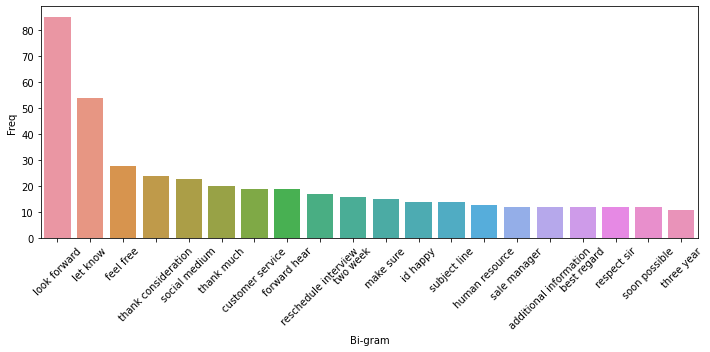

In [47]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

## TRIGRAM ANALYSIS

In [48]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [49]:
top3_words = get_top_n3_words(df['lemmatized_text'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [50]:
top3_df

,Tri-gram,Freq
0,look forward hear,19
1,feel free contact,10
2,look forward speak,8
3,subject line thank,8
4,id happy send,7
...,...,...
195,post craigslist assistant,2
196,craigslist assistant communication,2
197,communication director pique,2
198,director pique interest,2


## TRIGRAM VISUALIZATION

[Text(0, 0, 'look forward hear'),
 Text(1, 0, 'feel free contact'),
 Text(2, 0, 'look forward speak'),
 Text(3, 0, 'subject line thank'),
 Text(4, 0, 'id happy send'),
 Text(5, 0, 'thank much consideration'),
 Text(6, 0, 'look forward meet'),
 Text(7, 0, 'assistant communication director'),
 Text(8, 0, 'feel free reach'),
 Text(9, 0, 'social medium manager'),
 Text(10, 0, 'im look forward'),
 Text(11, 0, 'hello hope great'),
 Text(12, 0, 'hope great like'),
 Text(13, 0, 'great like reach'),
 Text(14, 0, 'like reach linkedin'),
 Text(15, 0, 'reach linkedin request'),
 Text(16, 0, 'linkedin request recommendation'),
 Text(17, 0, 'request recommendation team'),
 Text(18, 0, 'recommendation team project'),
 Text(19, 0, 'team project assign')]

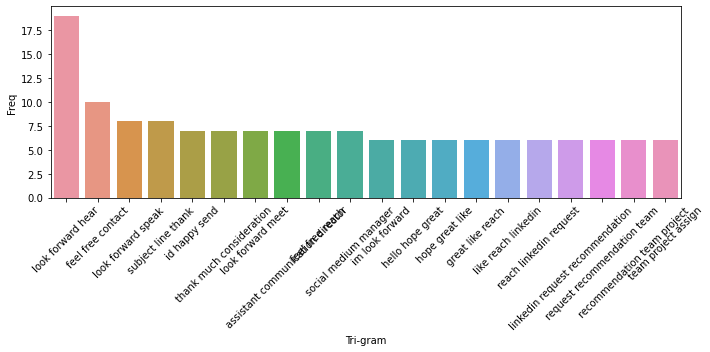

In [51]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# MODEL BUILDING

### Label the output

In [52]:
data['category_id'] = data['EMAIL_TOPICS'].factorize()[0]
from io import StringIO
category_id_df = data[['EMAIL_TOPICS', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'EMAIL_TOPICS']].values)

## VISUALIZATION OF NUMBER OF MAILS FOR EACH TEMPLATE

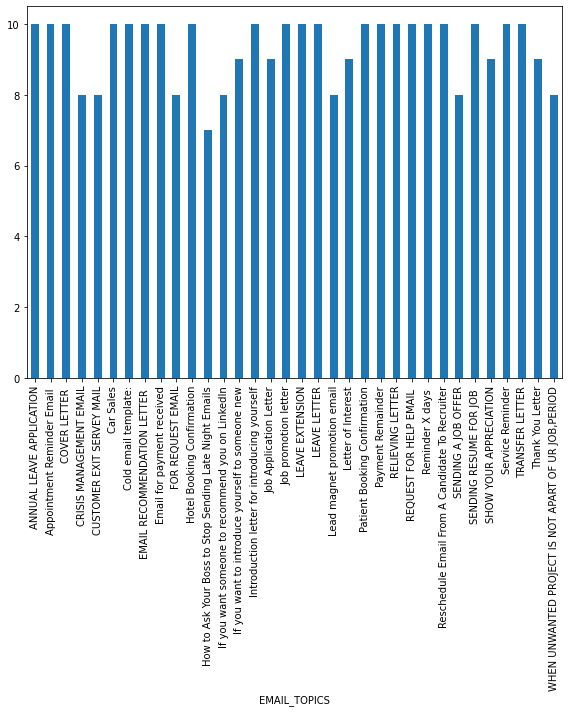

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,10))
data.groupby('EMAIL_TOPICS').lemmatized_text.count().plot.bar(ylim=0)
plt.show()

## TF-IDF

In [54]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data.lemmatized_text).toarray()
labels = data.category_id
features.shape

(318, 852)

## PERFORMING AND VISUALIZE NGRAM ANALYSIS ON EACH TEMPLATE

In [55]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for EMAIL_TEMPLATES, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(EMAIL_TEMPLATES))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'ANNUAL LEAVE APPLICATION':
  . Most correlated unigrams:
       . avail
       . annual
  . Most correlated bigrams:
       . leave application
       . annual leave
  . Most correlated trigrams:
       . 
# 'Appointment Reminder Email ':
  . Most correlated unigrams:
       . clinic
       . appointment
  . Most correlated bigrams:
       . appointment schedule
       . reminder appointment
  . Most correlated trigrams:
       . 
# 'COVER LETTER ':
  . Most correlated unigrams:
       . proven
       . namenovoresumecom
  . Most correlated bigrams:
       . year experience
       . marketing manager
  . Most correlated trigrams:
       . 
# 'CRISIS MANAGEMENT EMAIL':
  . Most correlated unigrams:
       . protect
       . impact
  . Most correlated bigrams:
       . answer question
       . team member
  . Most correlated trigrams:
       . 
# 'CUSTOMER EXIT SERVEY MAIL':
  . Most correlated unigrams:
       . feedback
       . survey
  . Most correlated bigrams:
       . hi thanks

## SPLIT THE DATA INTO TRAIN AND TEST 

###  FIT WITH CountVectorizer and TfidfTransformer

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_text'], data['EMAIL_TEMPLATES'],test_size=0.26, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [57]:
X_train.shape

(235,)

In [58]:
X_test.shape

(83,)

In [59]:
X_train_tfidf.shape

(235, 3293)

In [60]:
X_test_tfidf.shape

(83, 1690)

# USING MULTIPLE MODEL TO FIND WHICH IS BEST

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/ckishorekumarraju/Documents/harsha/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ckishorekumarraju/Documents/harsha/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
X1=data['lemmatized_text']
Y1=data['EMAIL_TEMPLATES']
x = data['lemmatized_text']
y = data['EMAIL_TEMPLATES']
vect = CountVectorizer()

In [62]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.05,random_state=42)
x_train_dtm = vect.fit_transform(x_train1)
x_test_dtm = vect.transform(x_test1)

NameError: name 'x' is not defined

## NAIVE BAYES

In [63]:
NB = MultinomialNB()
NB.fit(x_train_dtm,y_train1)
y_predict = NB.predict(x_test_dtm)
NB_acc = metrics.accuracy_score(y_test1,y_predict)
NB_acc

NameError: name 'x_train_dtm' is not defined

## SGDClassifier

In [66]:
from sklearn.linear_model import LinearRegression 
lm = SGDClassifier()
lm.fit(x_train_dtm,y_train1)
lm_predict = lm.predict(x_test_dtm)
SGD_acc= metrics.accuracy_score(y_test1,lm_predict)
SGD_acc

0.625

## RandomForestClassifier

In [67]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train1)
rf_predict = rf.predict(x_test_dtm)
Random_acc = metrics.accuracy_score(y_test1,rf_predict)
Random_acc

0.375

## XGBClassifier

In [68]:
xg = XGBClassifier()
xg.fit(x_train_dtm,y_train1)
xg_predict = xg.predict(x_test_dtm)
xg_acc = metrics.accuracy_score(y_test1,xg_predict)
xg_acc

[18:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.625

## PassiveAggressiveClassifier

In [69]:
pg = PassiveAggressiveClassifier()
pg.fit(x_train_dtm,y_train1)
pg_predict = pg.predict(x_test_dtm)
pg_acc = metrics.accuracy_score(y_test1,pg_predict)
pg_acc

0.8125

## LinearSVC

In [70]:
lv = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', tol=0.0001,
     verbose=0)
lv.fit(x_train_dtm,y_train1)
lv_predict = lv.predict(x_test_dtm)
lv_acc= metrics.accuracy_score(y_test1,lv_predict)
lv_acc

0.8125

In [71]:
data = {'Model':['MultinomialNB','SGDClassifier','RandomForestClassifier','XGBClassifier', 'PassiveAggressiveClassifier','LinearSVC'],'Accuracy':[NB_acc, SGD_acc,Random_acc,xg_acc,pg_acc,lv_acc]}

## ACCURACY SCORE OF EACH MODEL

In [72]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
4,PassiveAggressiveClassifier,0.8125
5,LinearSVC,0.8125
0,MultinomialNB,0.6875
1,SGDClassifier,0.6250
3,XGBClassifier,0.6250
2,RandomForestClassifier,0.3750


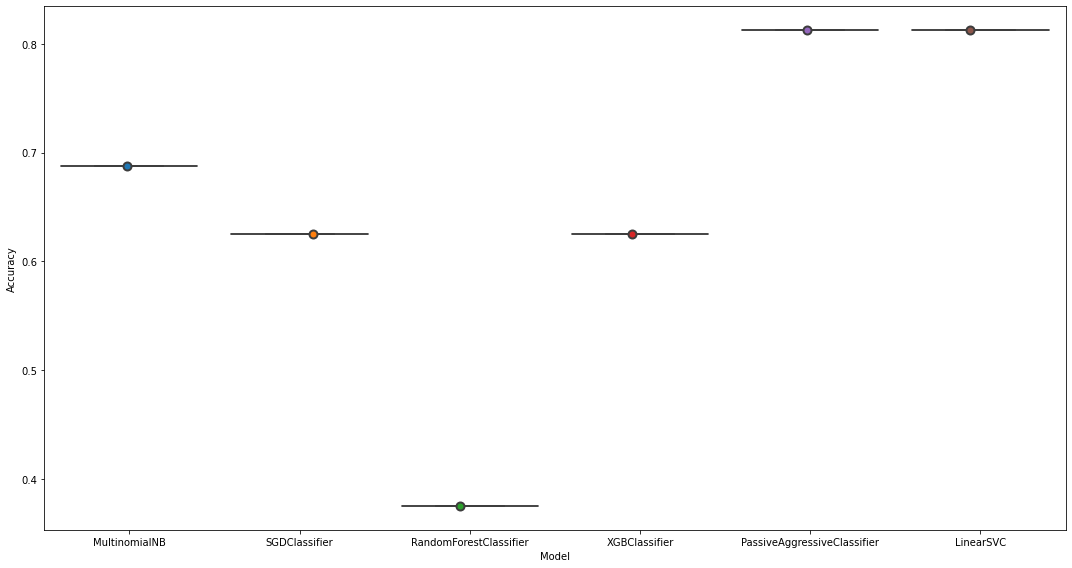

In [73]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y='Accuracy', data=data_model)
sns.stripplot(x='Model', y='Accuracy', data=data_model, 
              size=8, jitter=True, edgecolor="gray", linewidth=2,)
plt.show()

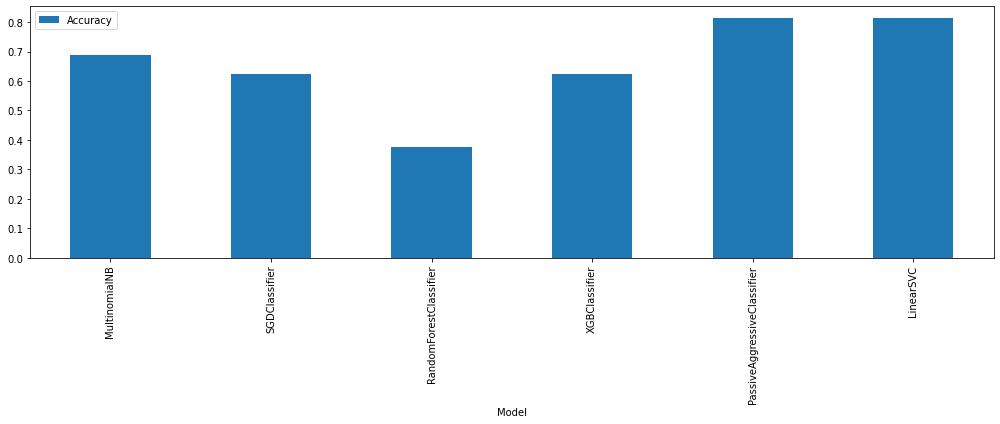

In [74]:
data_model.plot(x="Model", y="Accuracy", kind="bar")

## FROM ACCURACY SCORE PassiveAggressiveClassifier IS SHOWING MAXIMUM ACCURACY.                        

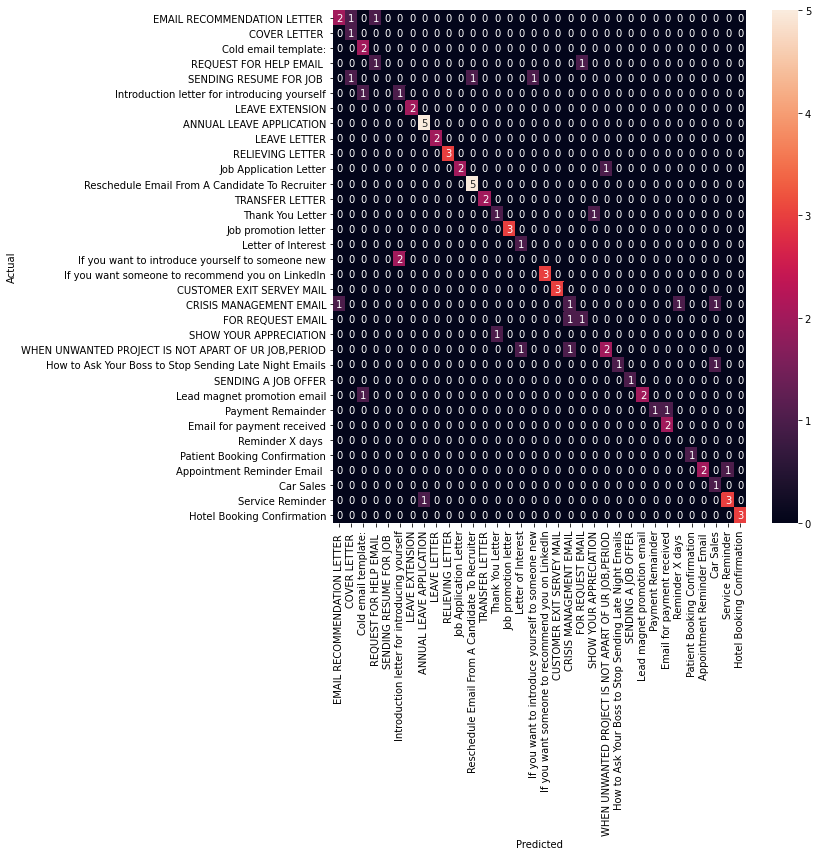

In [75]:
from sklearn.metrics import confusion_matrix
model = PassiveAggressiveClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.26, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.EMAIL_TOPICS.values, yticklabels=category_id_df.EMAIL_TOPICS.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [76]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['EMAIL_TOPICS'].unique()))

                                                        precision    recall  f1-score   support

                          EMAIL RECOMMENDATION LETTER        0.67      0.50      0.57         4
                                         COVER LETTER        0.33      1.00      0.50         1
                                  Cold email template:       0.50      1.00      0.67         2
                               REQUEST FOR HELP EMAIL        0.50      0.50      0.50         2
                               SENDING RESUME FOR JOB        0.00      0.00      0.00         3
          Introduction letter for introducing yourself       0.33      0.50      0.40         2
                                       LEAVE EXTENSION       1.00      1.00      1.00         2
                              ANNUAL LEAVE APPLICATION       0.83      1.00      0.91         5
                                          LEAVE LETTER       1.00      1.00      1.00         2
                                      R

## LETS WE FINALIZE THE MODEL USING PassiveAggressiveClassifier

In [77]:
X_COUNT = count_vect.fit_transform(X1)
X_TFIDF = tfidf_transformer.fit_transform(X_COUNT)

In [78]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, Y1)

## SAMPLE PREDICTION OF FINAL MODEL

In [79]:
print(modelf.predict(count_vect.transform(["sick leave"])))

['ANNUAL LEAVE APPLICATION                                                                                 Subject: Annual leave application\nDear (Recipient’s Name)\nI am writing this email with reference to my remaining annual leave quota. I am planning to go on a trip to Europe with my family. Thus, I would like to avail my remaining 25 days of annual leave from (Date) to (Date) \nI have assigned my duties to ( name of a team member) for the current project we are working on. He/She has been working with me and understands the role effectively. Also, I am looking for all the essential inputs required for the project before I leave for the vacation.\nI request you to consider my leave request. During my absence, I can be reached at my phone number and email id (Email address and contact no). \nYours sincerely\n(Your Name)']


In [80]:
print(modelf.predict(count_vect.transform(["appointment schedule"])))

['Appointment Reminder Email                                                                                Hi [Client Name],\n\nThis is a friendly reminder that we have an appointment scheduled for you on [Appointment Date] at [Appointment Time].\nIf you’re wondering how to get to us, here are the [Directions], and if you have any questions, you’ll be able to find the answers here (link).\nDon’t forget:\n\nPlease bring ______ with you.\nTry to arrive 15 minutes early.\nIf you need to re-schedule, you can give us a call on [Contact Number].\nSee you soon!\n\nBest Regards,\nThe [Practice Name] Team\n[eSignature']


# SAVE THE MODEL IN PICKLE FILE 

In [81]:
import pickle

In [83]:
modelf=PassiveAggressiveClassifier().fit(X_TFIDF, Y1)

    # Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

    # Save the model
mod_file = 'classification1.model'
pickle.dump(modelf, open(mod_file, 'wb'))

# Conclusion
## - Our email template worked well with PassiveAggressiveClassifier model.